In [1]:
#!pip install xgboost

In [2]:
# Install or update compatible versions
# !pip install -U scikit-learn
# !pip install -U imbalanced-learn

In [3]:
# !pip uninstall scikit-learn --yes
# !pip uninstall imblearn --yes
# !pip install scikit-learn==1.2.2
# !pip install imblearn

Found existing installation: scikit-learn 1.6.1
Uninstalling scikit-learn-1.6.1:
  Successfully uninstalled scikit-learn-1.6.1
Found existing installation: imblearn 0.0
Uninstalling imblearn-0.0:
  Successfully uninstalled imblearn-0.0
  Obtaining dependency information for scikit-learn==1.2.2 from https://files.pythonhosted.org/packages/db/98/169b46a84b48f92df2b5e163fce75d471f4df933f8b3d925a61133210776/scikit_learn-1.2.2-cp311-cp311-win_amd64.whl.metadata
  Using cached scikit_learn-1.2.2-cp311-cp311-win_amd64.whl.metadata (11 kB)
Using cached scikit_learn-1.2.2-cp311-cp311-win_amd64.whl (8.3 MB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.13.0 requires scikit-learn<2,>=1.3.2, but you have scikit-learn 1.2.2 which is incompatible.


  Obtaining dependency information for imblearn from https://files.pythonhosted.org/packages/81/a7/4179e6ebfd654bd0eac0b9c06125b8b4c96a9d0a8ff9e9507eb2a26d2d7e/imblearn-0.0-py2.py3-none-any.whl.metadata
  Using cached imblearn-0.0-py2.py3-none-any.whl.metadata (355 bytes)
  Obtaining dependency information for scikit-learn<2,>=1.3.2 from https://files.pythonhosted.org/packages/a1/a6/c5b78606743a1f28eae8f11973de6613a5ee87366796583fb74c67d54939/scikit_learn-1.6.1-cp311-cp311-win_amd64.whl.metadata
  Using cached scikit_learn-1.6.1-cp311-cp311-win_amd64.whl.metadata (15 kB)
Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
Using cached scikit_learn-1.6.1-cp311-cp311-win_amd64.whl (11.1 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [16]:
# Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
sb.set() 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('MentalHealthSurvey.csv')
df.head()

,gender,age,university,degree_level,degree_major,academic_year,cgpa,residential_status,campus_discrimination,sports_engagement,...,study_satisfaction,academic_workload,academic_pressure,financial_concerns,social_relationships,depression,anxiety,isolation,future_insecurity,stress_relief_activities
0,Male,20,PU,Undergraduate,Data Science,2nd year,3.0-3.5,Off-Campus,No,No Sports,...,5,4,5,4,3,2,1,1,2,"Religious Activities, Social Connections, Onli..."
1,Male,20,UET,Postgraduate,Computer Science,3rd year,3.0-3.5,Off-Campus,No,1-3 times,...,5,4,4,1,3,3,3,3,4,Online Entertainment
2,Male,20,FAST,Undergraduate,Computer Science,3rd year,2.5-3.0,Off-Campus,No,1-3 times,...,5,5,5,3,4,2,3,3,1,"Religious Activities, Sports and Fitness, Onli..."
3,Male,20,UET,Undergraduate,Computer Science,3rd year,2.5-3.0,On-Campus,No,No Sports,...,3,5,4,4,1,5,5,5,3,Online Entertainment
4,Female,20,UET,Undergraduate,Computer Science,3rd year,3.0-3.5,Off-Campus,Yes,No Sports,...,3,5,5,2,3,5,5,4,4,Online Entertainment


Dataset Shape: (87, 25)

First 5 rows of data:


,gender,age,university,degree_level,degree_major,academic_year,cgpa,residential_status,campus_discrimination,sports_engagement,...,social_relationships,depression,anxiety,isolation,future_insecurity,stress_relief_activities,cgpa_numeric,min_sleep_hours,max_sleep_hours,avg_sleep_hours_value
0,Male,20,PU,Undergraduate,Data Science,2nd year,3.0-3.5,Off-Campus,No,No Sports,...,3,2,1,1,2,"Religious Activities, Social Connections, Onli...",3.25,4,6,5.0
1,Male,20,UET,Postgraduate,Computer Science,3rd year,3.0-3.5,Off-Campus,No,1-3 times,...,3,3,3,3,4,Online Entertainment,3.25,4,6,5.0
2,Male,20,FAST,Undergraduate,Computer Science,3rd year,2.5-3.0,Off-Campus,No,1-3 times,...,4,2,3,3,1,"Religious Activities, Sports and Fitness, Onli...",2.75,2,4,3.0
3,Male,20,UET,Undergraduate,Computer Science,3rd year,2.5-3.0,On-Campus,No,No Sports,...,1,5,5,5,3,Online Entertainment,2.75,4,6,5.0
4,Female,20,UET,Undergraduate,Computer Science,3rd year,3.0-3.5,Off-Campus,Yes,No Sports,...,3,5,5,4,4,Online Entertainment,3.25,4,6,5.0



Actual column names in the dataset:
['gender', 'age', 'university', 'degree_level', 'degree_major', 'academic_year', 'cgpa', 'residential_status', 'campus_discrimination', 'sports_engagement', 'average_sleep', 'study_satisfaction', 'academic_workload ', 'academic_pressure', 'financial_concerns', 'social_relationships', 'depression', 'anxiety', 'isolation', 'future_insecurity', 'stress_relief_activities', 'cgpa_numeric', 'min_sleep_hours', 'max_sleep_hours', 'avg_sleep_hours_value']

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   gender                    87 non-null     object 
 1   age                       87 non-null     int64  
 2   university                87 non-null     object 
 3   degree_level              87 non-null     object 
 4   degree_major              87 non-null     object 
 5   academi

,age,study_satisfaction,academic_workload,academic_pressure,financial_concerns,social_relationships,depression,anxiety,isolation,future_insecurity,cgpa_numeric,min_sleep_hours,max_sleep_hours,avg_sleep_hours_value
count,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000
mean,19.942529,3.931034,3.885057,3.781609,3.390805,2.781609,3.218391,3.218391,3.241379,3.011494,3.011494,4.988506,6.620690,5.804598
std,1.623636,1.043174,0.854880,1.125035,1.400634,1.175578,1.367609,1.297809,1.405682,1.385089,0.893214,1.610245,1.153774,1.379578
min,17.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,2.000000,4.000000,3.000000
25%,19.000000,3.000000,3.000000,3.000000,2.500000,2.000000,2.000000,2.000000,2.000000,2.000000,2.750000,4.000000,6.000000,5.000000
50%,20.000000,4.000000,4.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.250000,4.000000,6.000000,5.000000
75%,21.000000,5.000000,4.500000,5.000000,5.000000,4.000000,4.000000,4.000000,4.500000,4.000000,3.750000,7.000000,8.000000,7.500000
max,26.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.750000,7.000000,8.000000,7.500000



Checking for missing values:


gender                      0
age                         0
university                  0
degree_level                0
degree_major                0
academic_year               0
cgpa                        0
residential_status          0
campus_discrimination       0
sports_engagement           0
average_sleep               0
study_satisfaction          0
academic_workload           0
academic_pressure           0
financial_concerns          0
social_relationships        0
depression                  0
anxiety                     0
isolation                   0
future_insecurity           0
stress_relief_activities    0
cgpa_numeric                0
min_sleep_hours             0
max_sleep_hours             0
avg_sleep_hours_value       0
dtype: int64


Unique values in categorical columns:

gender: ['Male' 'Female']

university: ['PU' 'UET' 'FAST' 'COMSATS' 'NUST' 'VU' 'UMT' 'UOL' 'KUST']

degree_level: ['Undergraduate' 'Postgraduate']

degree_major: ['Data Science' 'Computer Science' 'Software Engineering'
 'Information Technology']

residential_status: ['Off-Campus' 'On-Campus']

sports_engagement: ['No Sports' '1-3 times' '7+ times' '4-6 times']


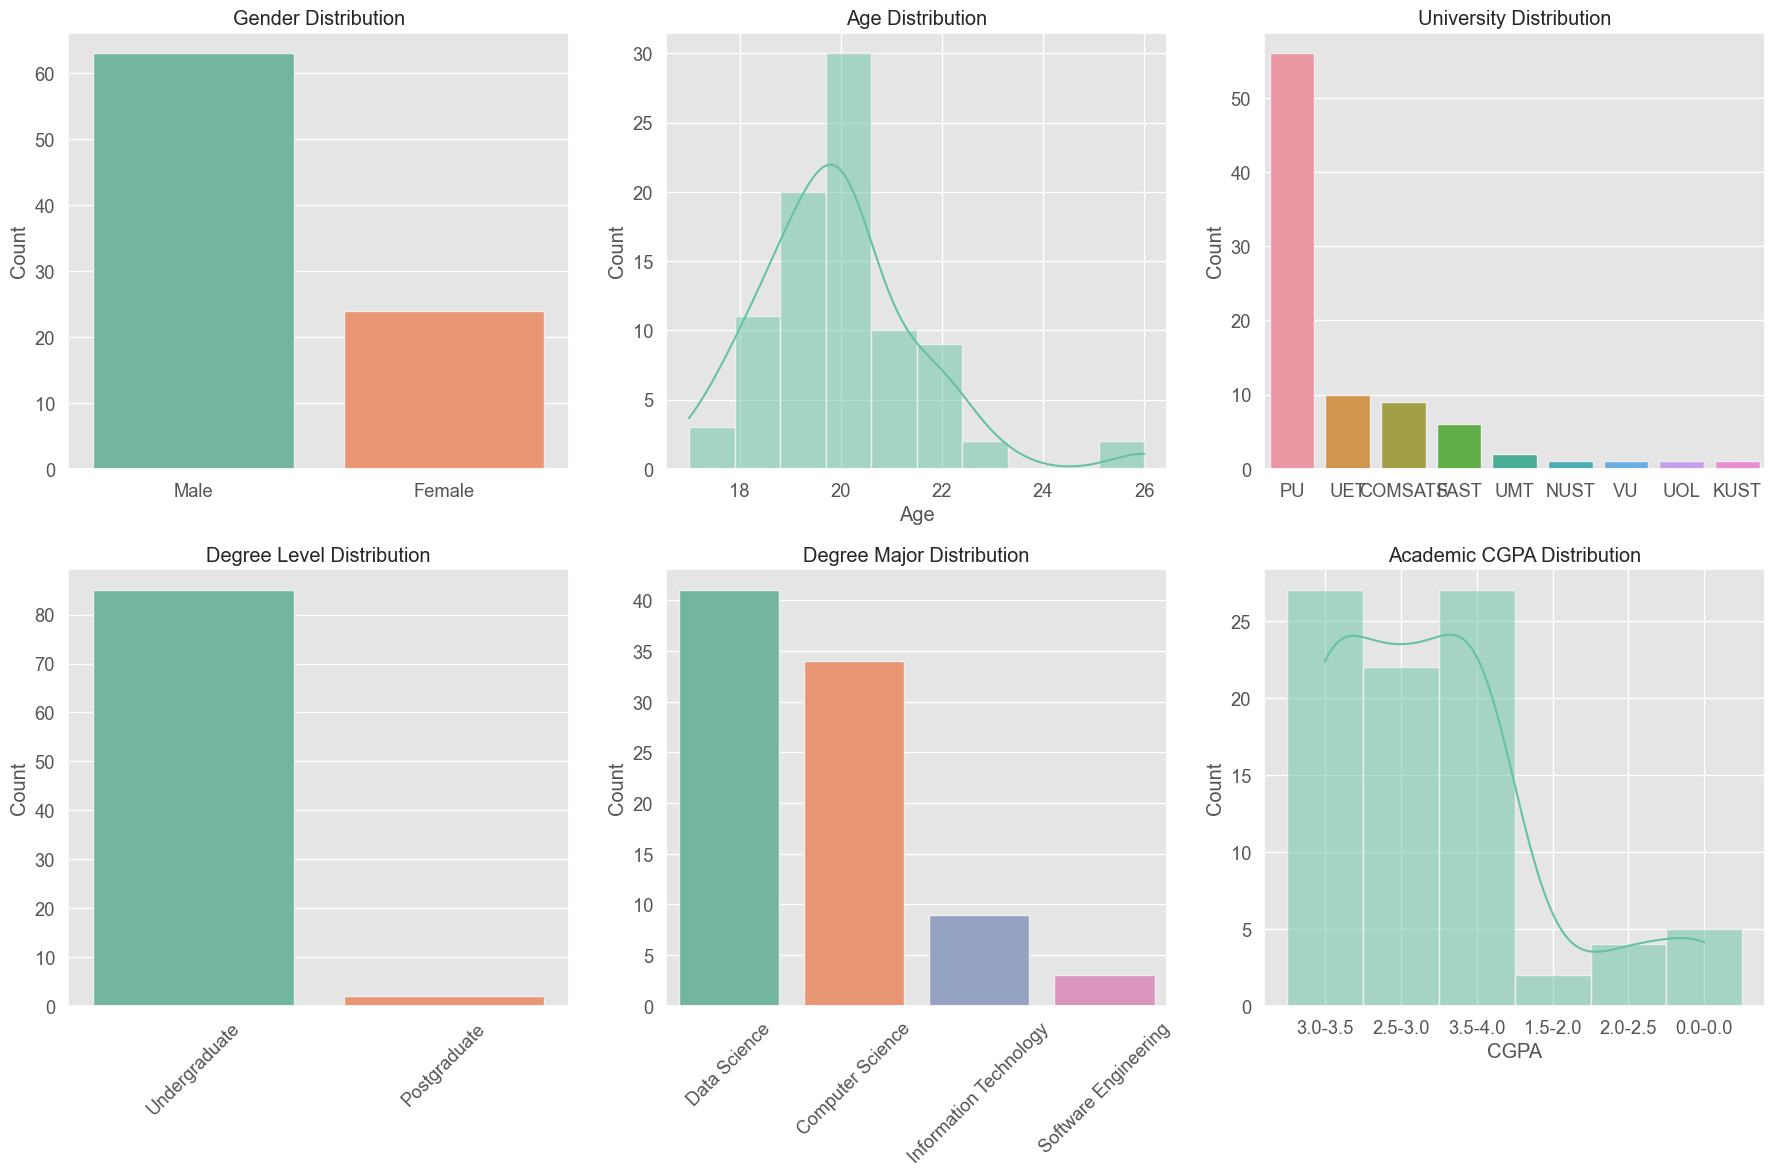

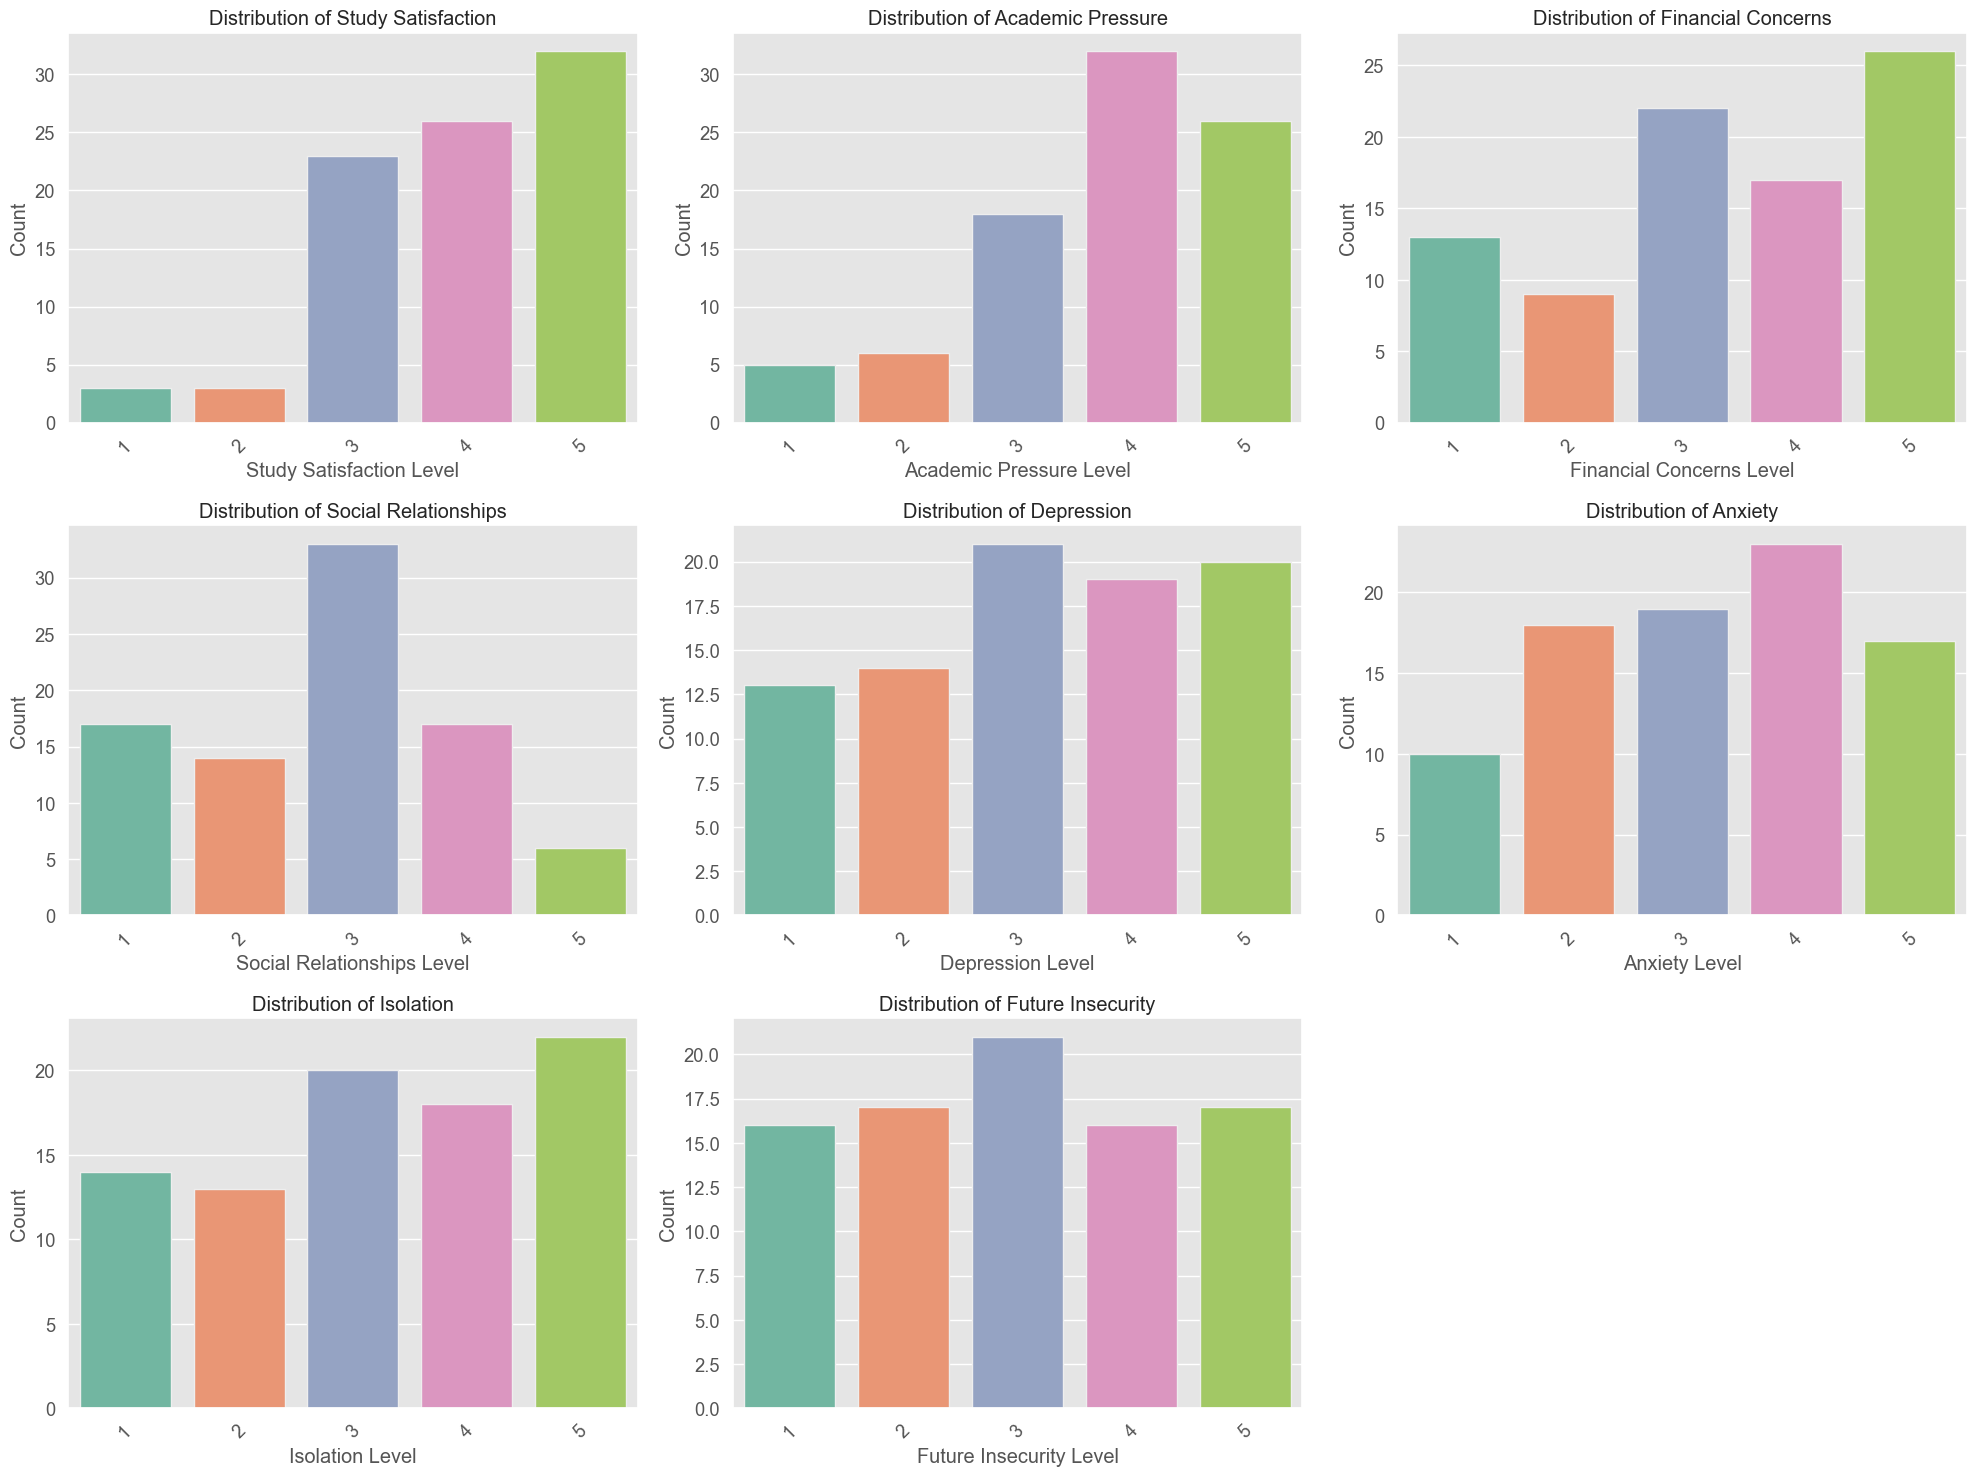

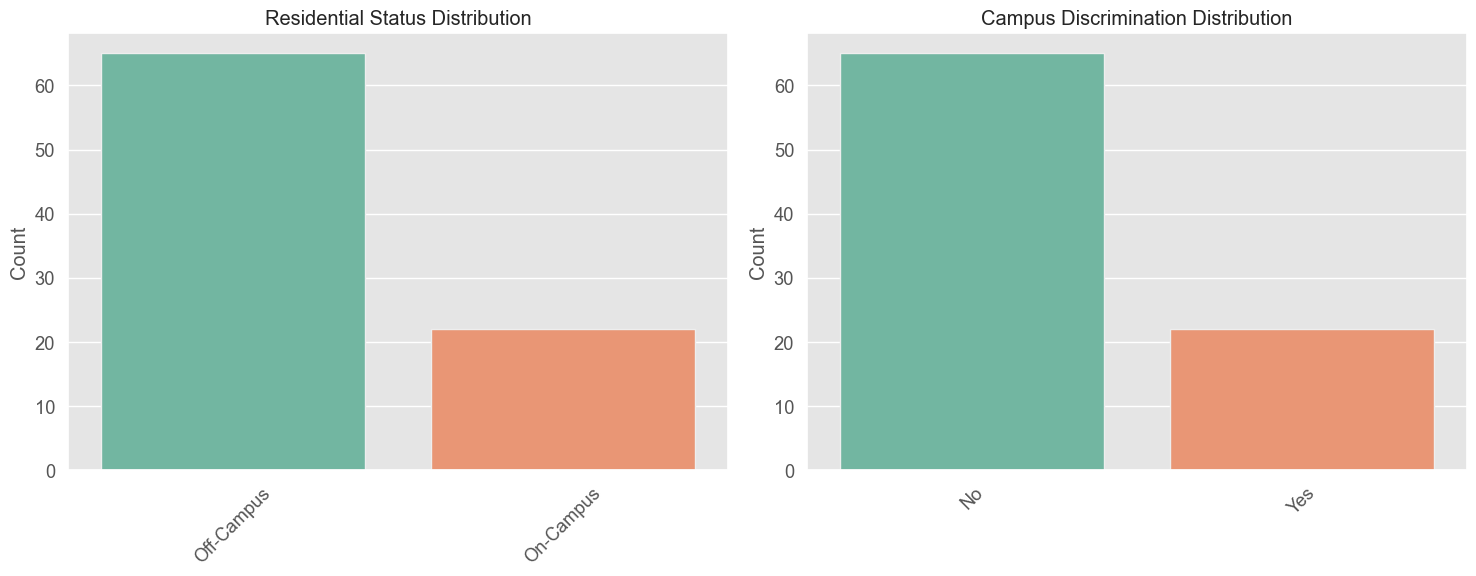

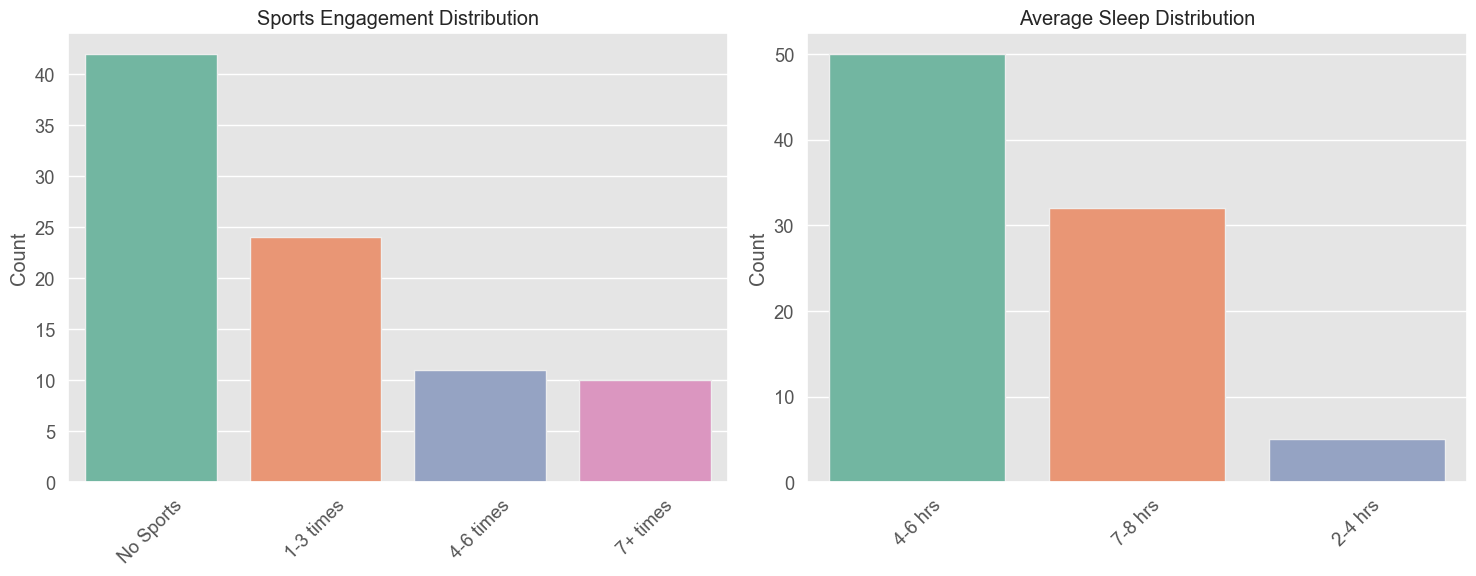

<Figure size 1400x1000 with 0 Axes>

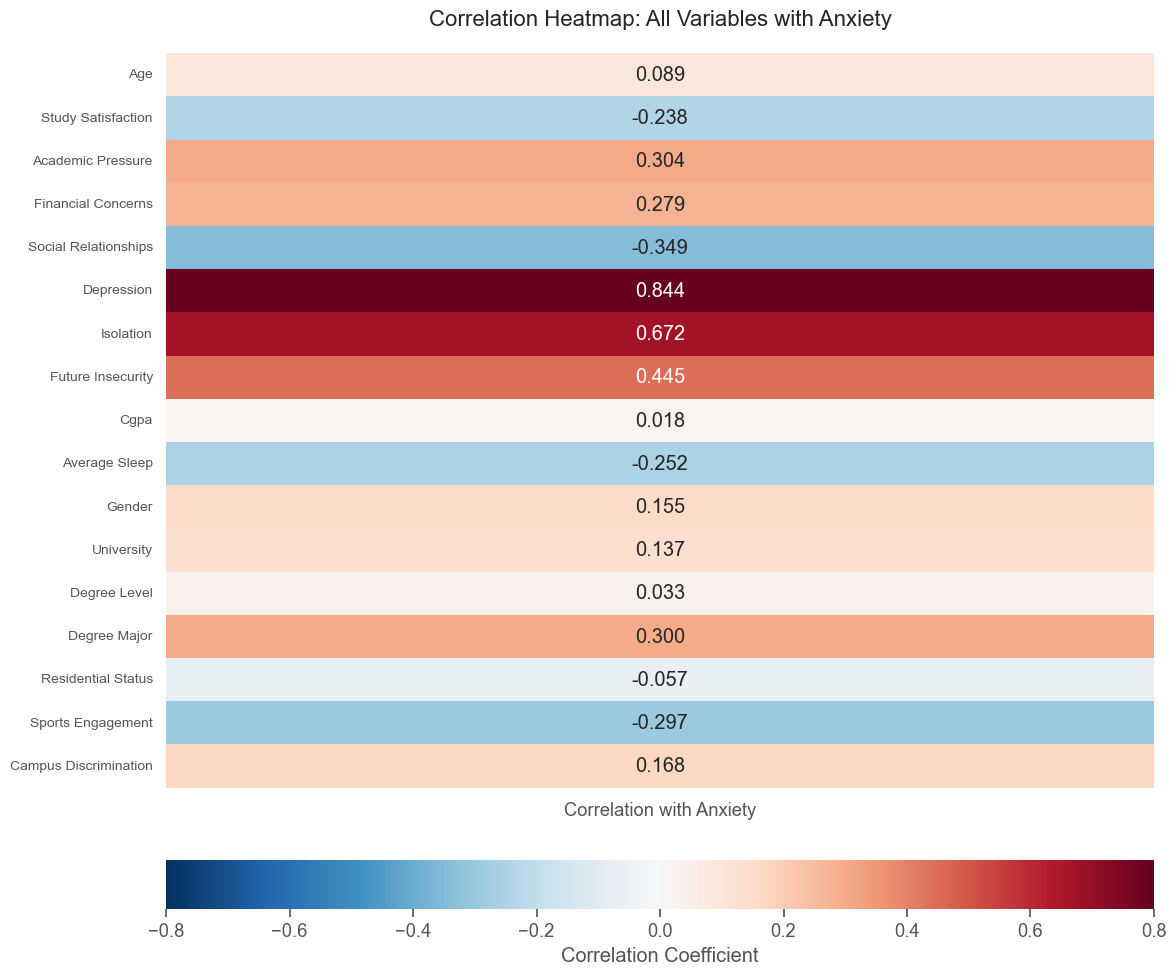


Correlation Table: All Variables with Anxiety
--------------------------------------------------
             Variable  Correlation  p_value
           Depression        0.844    0.000
            Isolation        0.672    0.000
    Future Insecurity        0.445    0.000
 Social Relationships       -0.349    0.001
    Academic Pressure        0.304    0.004
         Degree Major        0.300    0.005
    Sports Engagement       -0.297    0.005
   Financial Concerns        0.279    0.009
        Average Sleep       -0.252    0.019
   Study Satisfaction       -0.238    0.027
Campus Discrimination        0.168    0.120
               Gender        0.155    0.153
           University        0.137    0.207
                  Age        0.089    0.413
   Residential Status       -0.057    0.597
         Degree Level        0.033    0.758
                 Cgpa        0.018    0.870


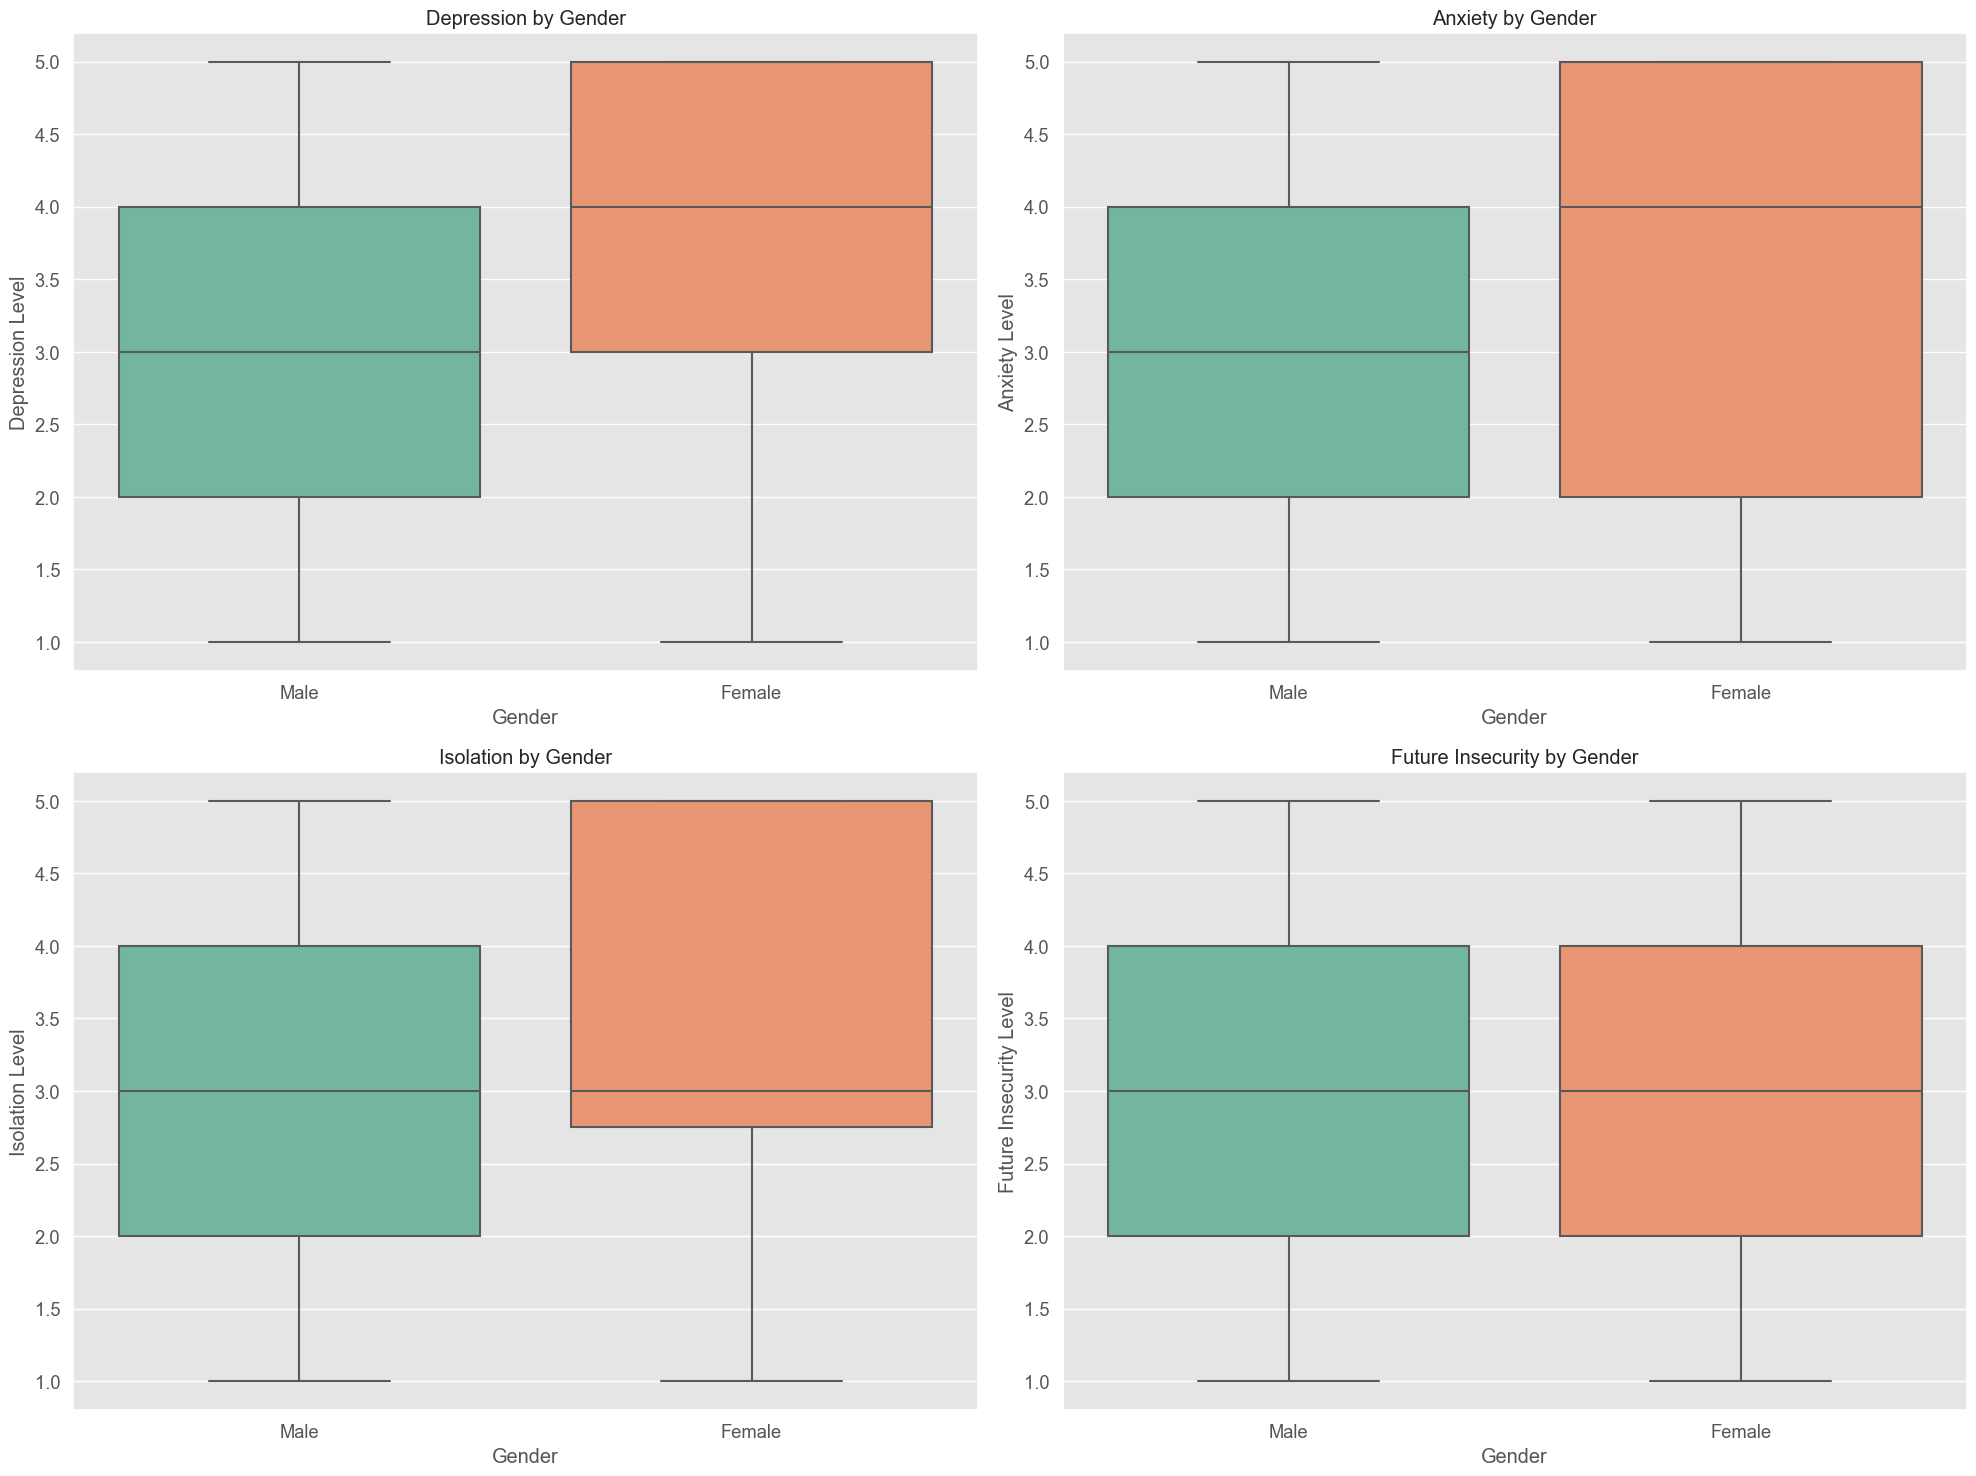

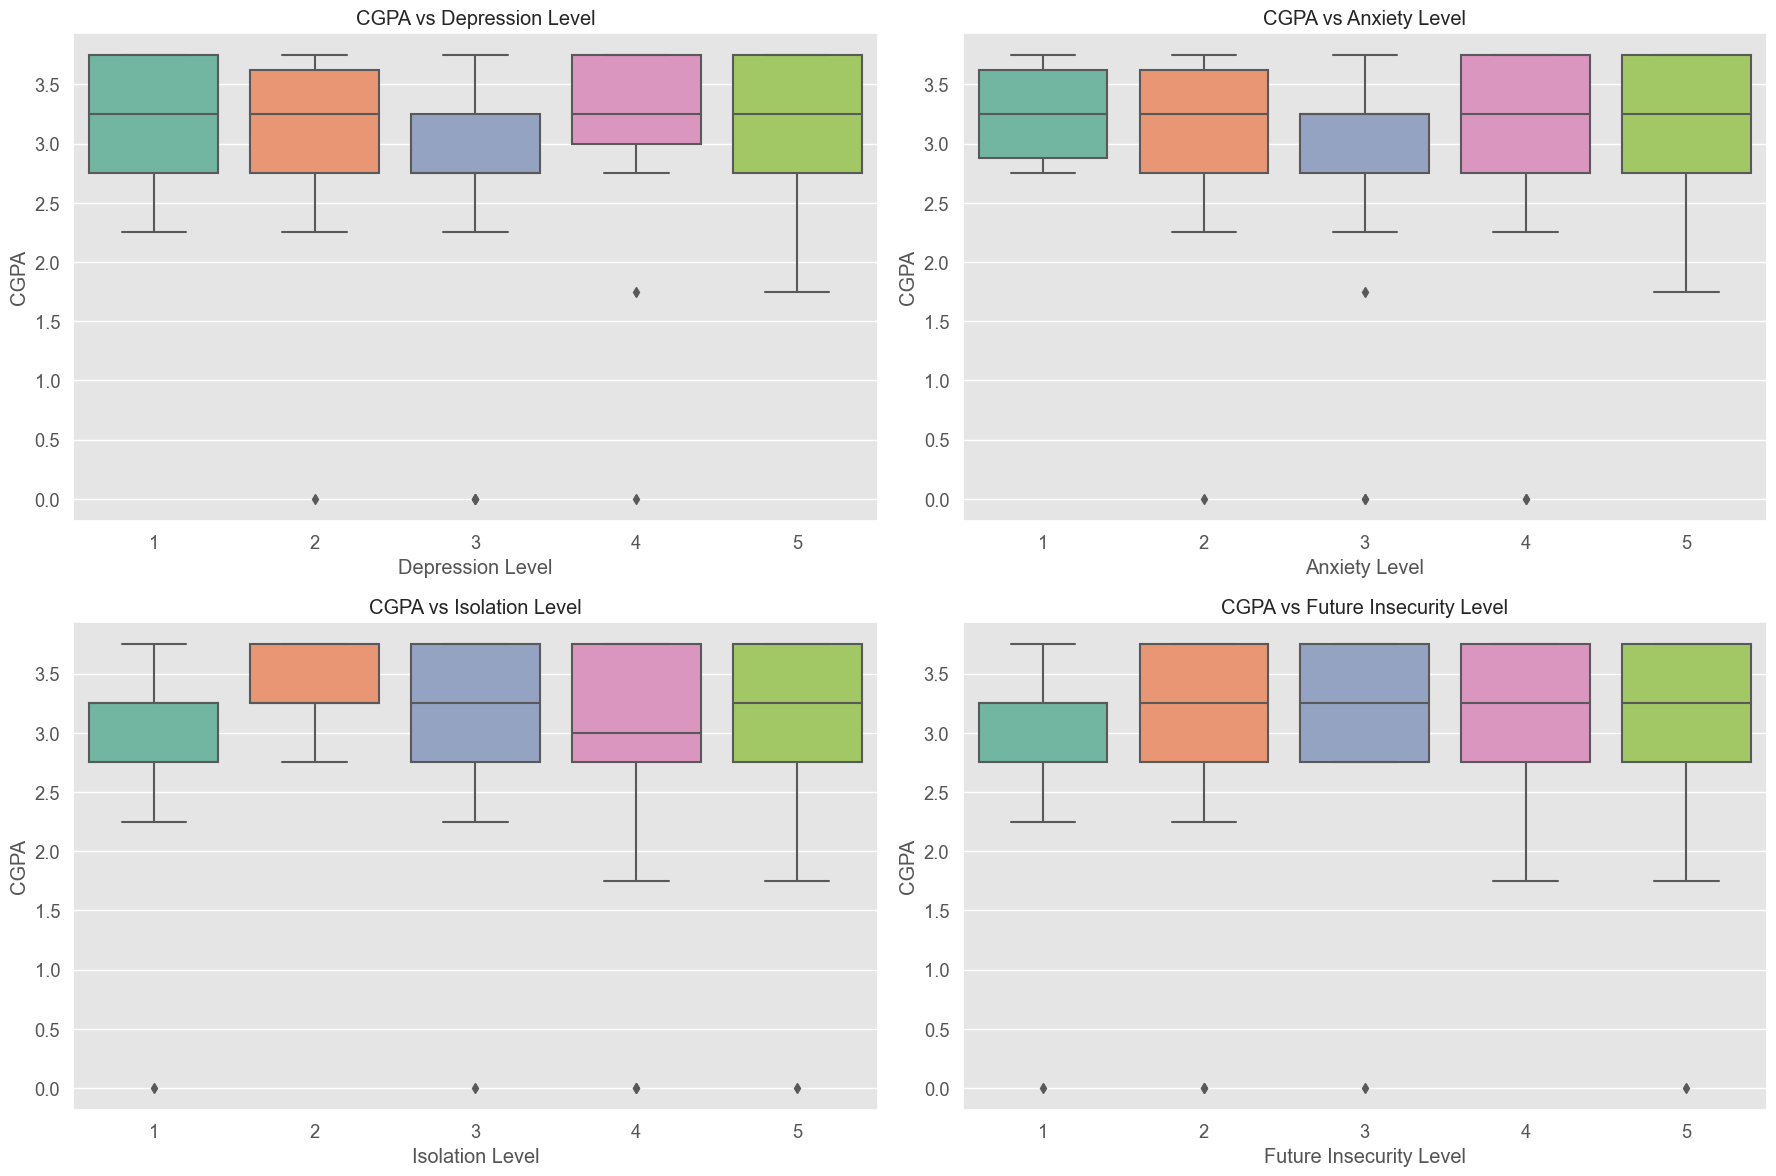

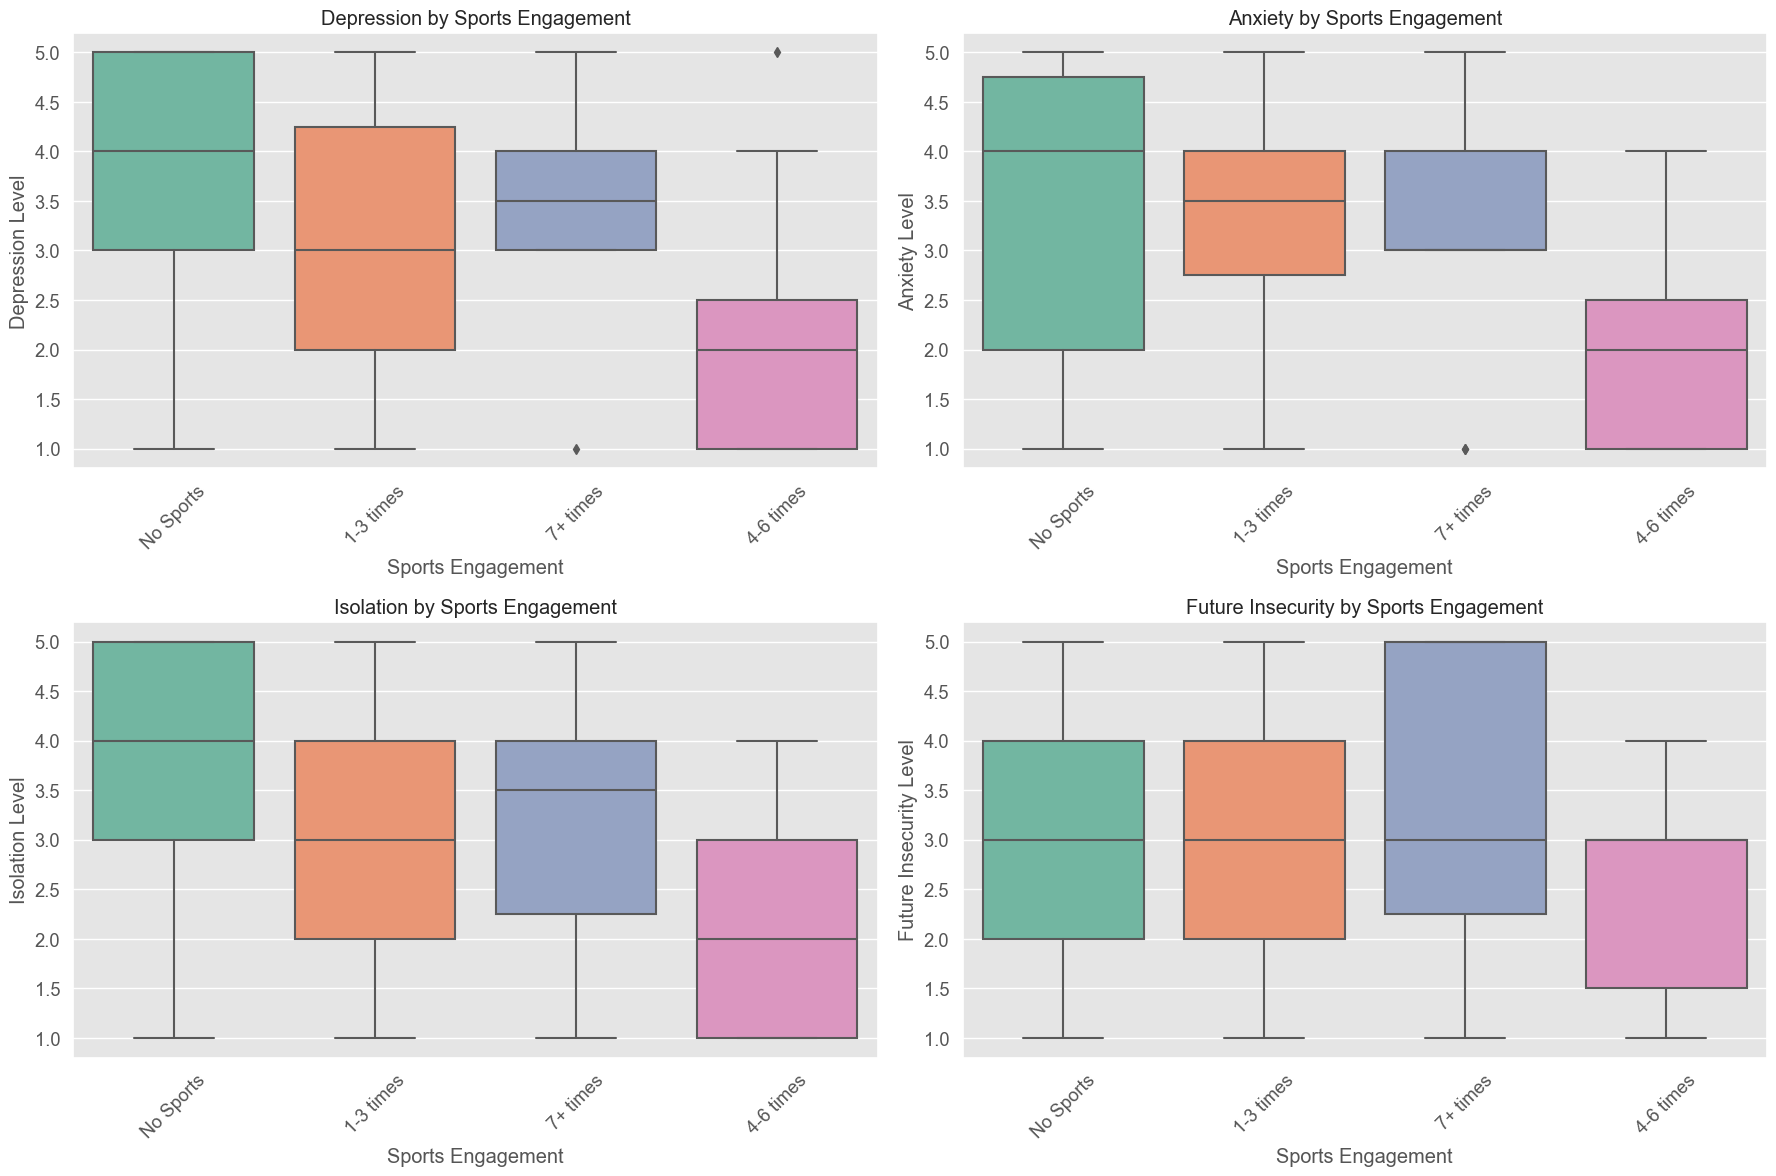

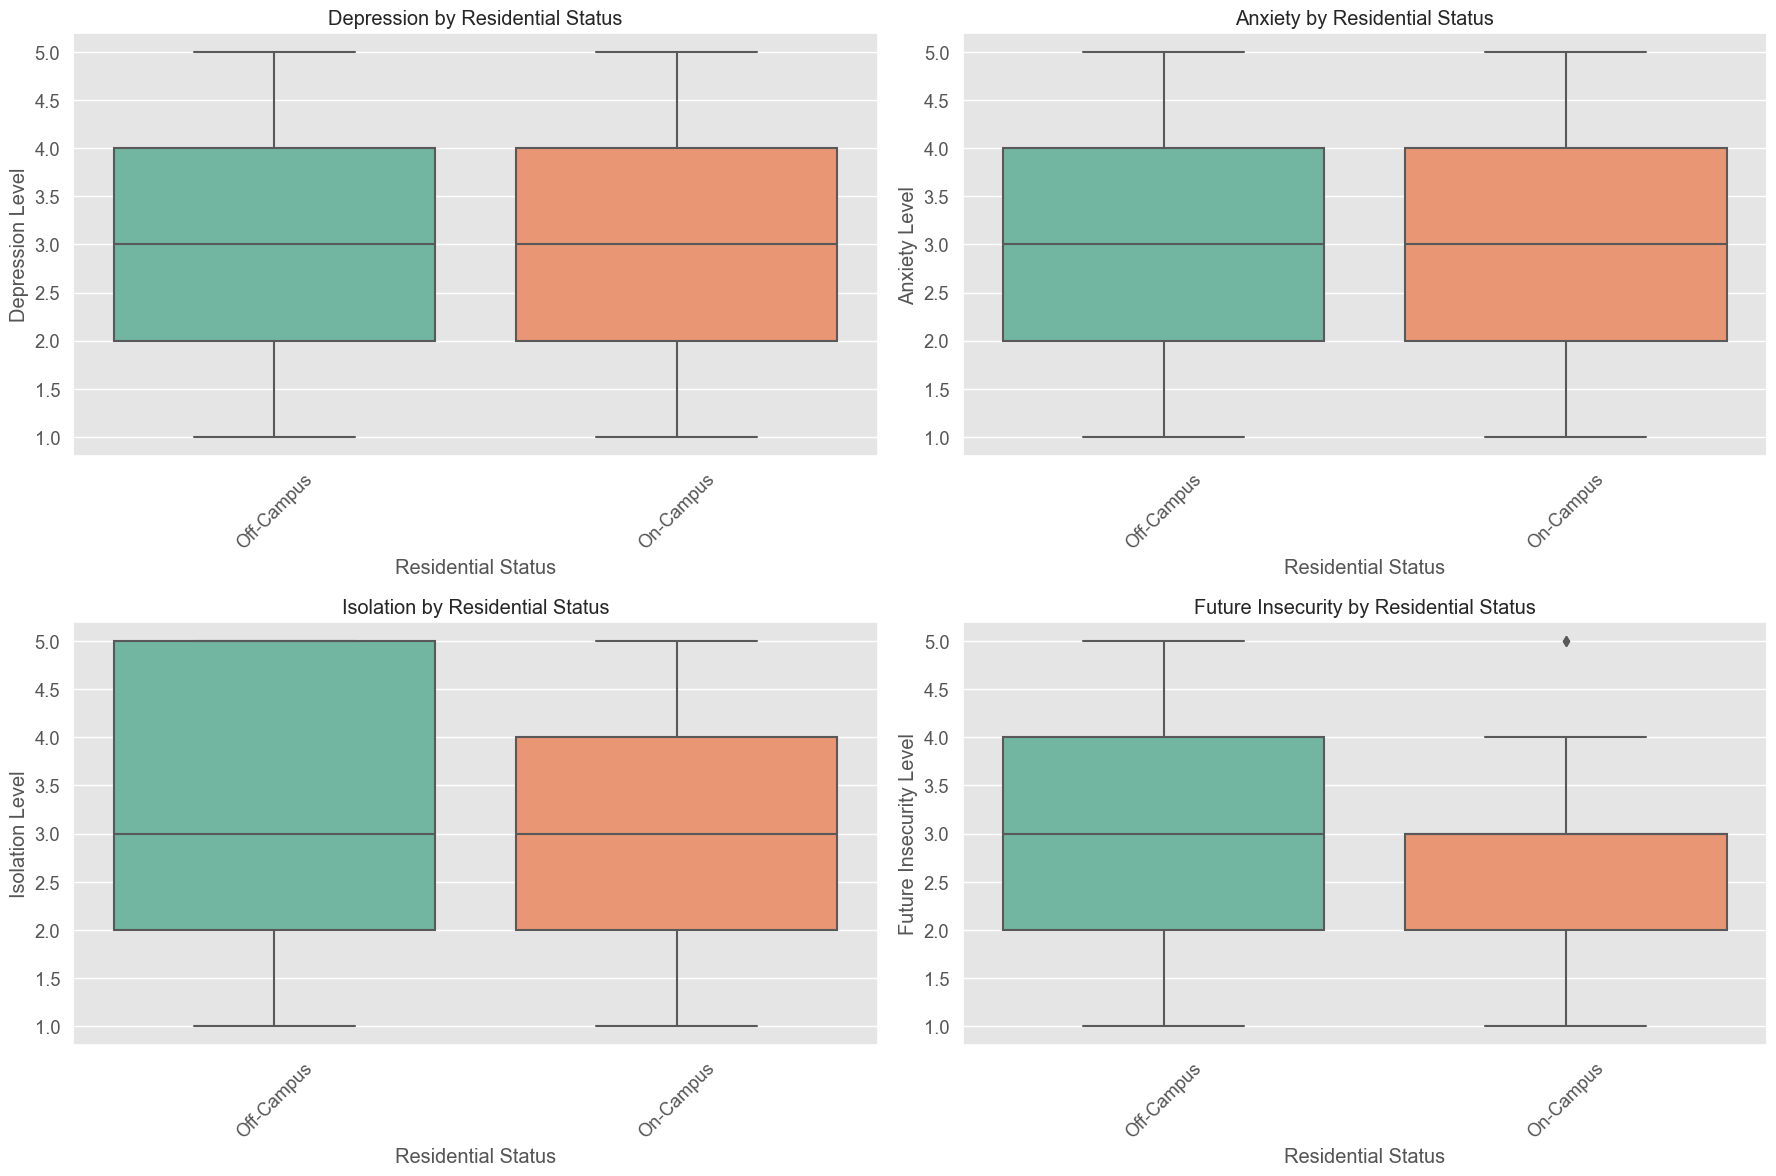


Unique Stress Relief Activities:
['Religious Activities' 'Social Connections' 'Online Entertainment'
 'Sports and Fitness' 'Outdoor Activities' 'Nothing' 'Creative Outlets'
 'Sleep']


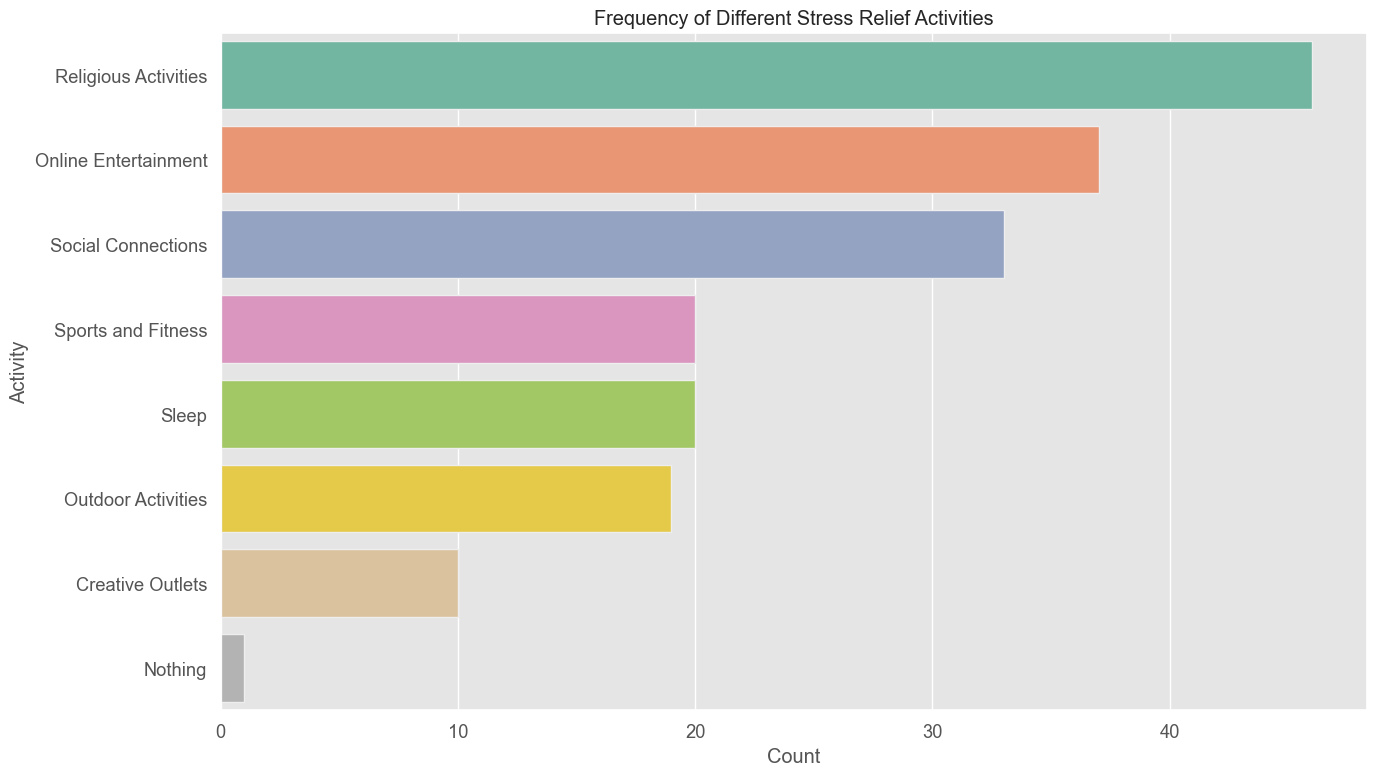

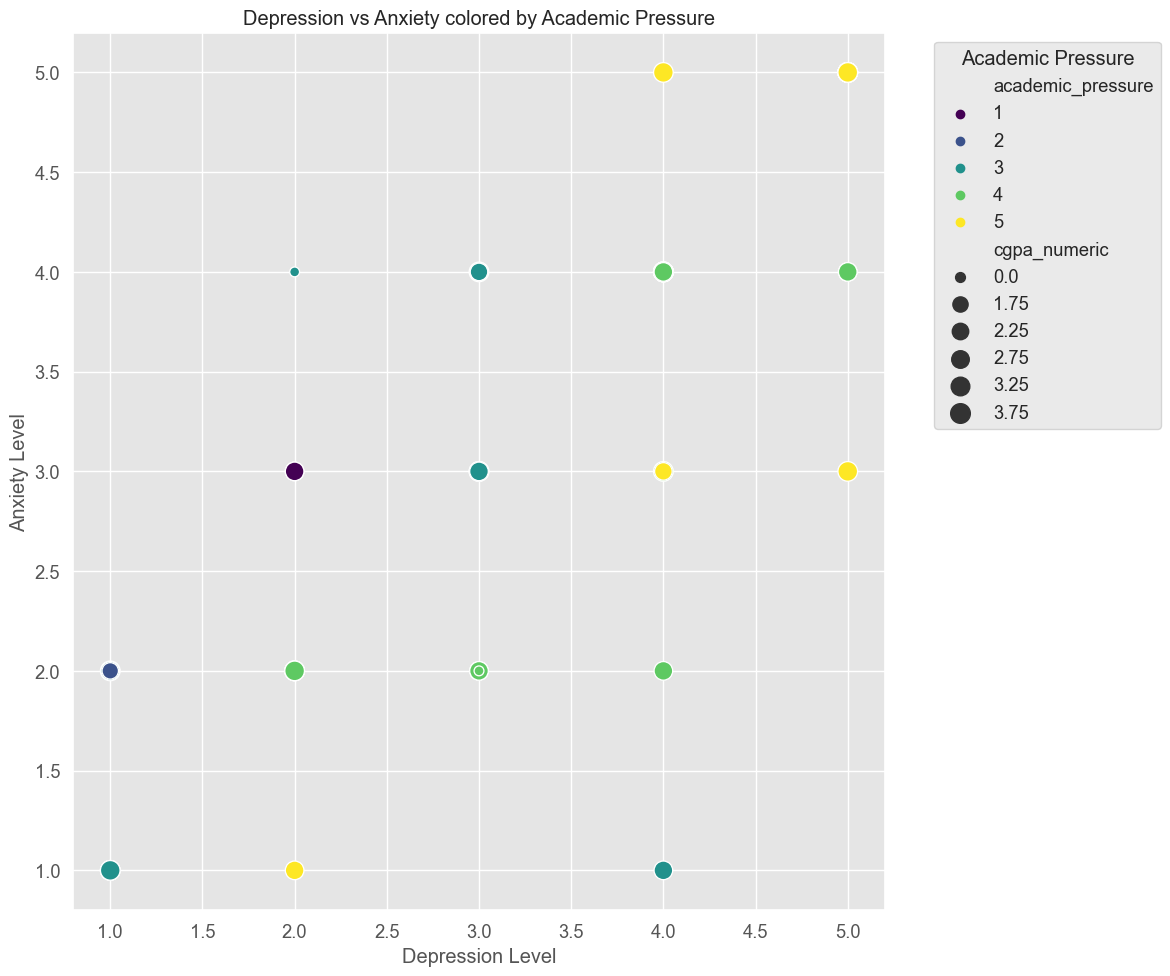

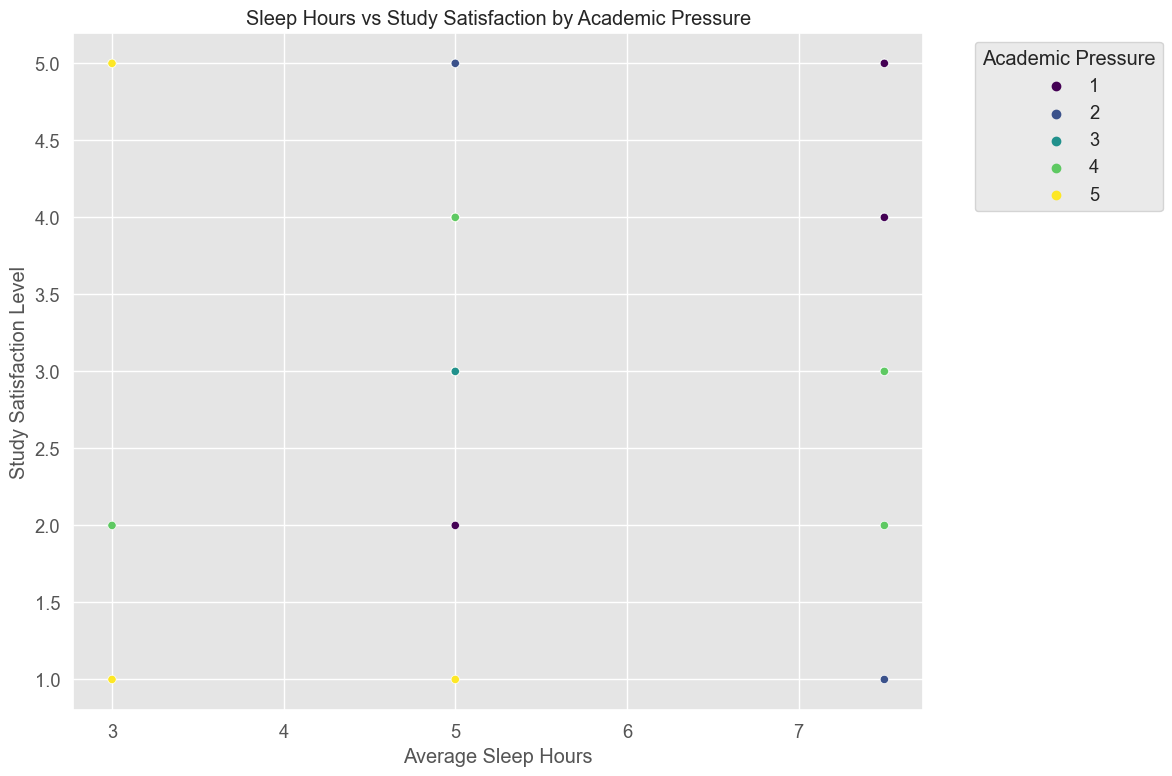


T-test for Depression Levels between Off-Campus and On-Campus Students:
t-statistic: 0.1443
p-value: 0.8856
Significant difference: False

ANOVA for Anxiety Levels across Universities:
F-statistic: 2.6657
p-value: 0.0122
Significant difference: True

Chi-square test for Gender and Sports Engagement:
Chi2: 10.6321
p-value: 0.0139
Significant association: True

=== SUMMARY OF KEY FINDINGS ===
1. Dataset contains information on 87 students.
2. Gender distribution: {'Male': 72.4, 'Female': 27.6}
3. Age range: 17 to 26 years, with mean 19.9 years.
4. Top university representation: PU with 56 students.
5. Most common stress relief activity: Religious Activities
6. Average depression level: 3.22
7. Average anxiety level: 3.22
8. Correlation between CGPA and depression: 0.072
9. Correlation between CGPA and anxiety: 0.018


In [28]:
# Mental Health Survey - Exploratory Data Analysis

# Set visualization styles
plt.style.use('ggplot')
sns.set_palette("Set2")
sns.set_context("notebook", font_scale=1.2)

# 1. Basic Data Exploration
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows of data:")
display(df.head())

print("\nActual column names in the dataset:")
print(df.columns.tolist())

print("\nData Info:")
df.info()

print("\nDescriptive Statistics:")
display(df.describe())

print("\nChecking for missing values:")
display(df.isnull().sum())

# 2. Data Cleaning and Preparation
# Check unique values in key columns
print("\nUnique values in categorical columns:")
categorical_cols = ['gender', 'university', 'degree_level', 'degree_major', 'residential_status', 'sports_engagement']
for col in categorical_cols:
    if col in df.columns:
        print(f"\n{col}: {df[col].unique()}")
    else:
        print(f"\n{col}: Column not found in dataset")

# 3. Univariate Analysis

# 3.1 Demographic Distribution
plt.figure(figsize=(18, 12))

# Gender distribution
if 'gender' in df.columns:
    plt.subplot(2, 3, 1)
    gender_counts = df['gender'].value_counts()
    sns.barplot(x=gender_counts.index, y=gender_counts.values)
    plt.title('Gender Distribution')
    plt.ylabel('Count')

# Age distribution
if 'age' in df.columns:
    plt.subplot(2, 3, 2)
    sns.histplot(df['age'], kde=True, bins=10)
    plt.title('Age Distribution')
    plt.xlabel('Age')

# University distribution
if 'university' in df.columns:
    plt.subplot(2, 3, 3)
    uni_counts = df['university'].value_counts()
    sns.barplot(x=uni_counts.index, y=uni_counts.values)
    plt.title('University Distribution')
    plt.ylabel('Count')

# Degree level distribution
if 'degree_level' in df.columns:
    plt.subplot(2, 3, 4)
    degree_level_counts = df['degree_level'].value_counts()
    sns.barplot(x=degree_level_counts.index, y=degree_level_counts.values)
    plt.title('Degree Level Distribution')
    plt.ylabel('Count')
    plt.xticks(rotation=45)

# Degree major distribution
if 'degree_major' in df.columns:
    plt.subplot(2, 3, 5)
    major_counts = df['degree_major'].value_counts()
    sns.barplot(x=major_counts.index, y=major_counts.values)
    plt.title('Degree Major Distribution')
    plt.ylabel('Count')
    plt.xticks(rotation=45)

# Academic CGPA distribution
if 'cgpa' in df.columns:
    plt.subplot(2, 3, 6)
    sns.histplot(df['cgpa'], kde=True, bins=10)
    plt.title('Academic CGPA Distribution')
    plt.xlabel('CGPA')

plt.tight_layout()
plt.show()

# 3.2 Mental Health Metrics Distribution
# First, identify which mental health columns actually exist in the dataset
all_mental_health_cols = ['study_satisfaction', 'academic_pressure', 
                        'financial_concerns', 'social_relationships', 'depression', 
                        'anxiety', 'isolation', 'future_insecurity']

mental_health_cols = [col for col in all_mental_health_cols if col in df.columns]

if mental_health_cols:
    num_cols = len(mental_health_cols)
    rows = (num_cols + 2) // 3  # Calculate rows needed (ceiling division)
    plt.figure(figsize=(20, 5 * rows))
    
    for i, col in enumerate(mental_health_cols, 1):
        plt.subplot(rows, 3, i)
        sns.countplot(x=df[col])
        plt.title(f'Distribution of {col.replace("_", " ").title()}')
        plt.xlabel(f'{col.replace("_", " ").title()} Level')
        plt.ylabel('Count')
        plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()

# 3.3 Residential Status and Campus Discrimination
if 'residential_status' in df.columns or 'campus_discrimination' in df.columns:
    plt.figure(figsize=(15, 6))
    
    subplot_count = 1
    if 'residential_status' in df.columns:
        plt.subplot(1, 2 if 'campus_discrimination' in df.columns else 1, subplot_count)
        res_counts = df['residential_status'].value_counts()
        sns.barplot(x=res_counts.index, y=res_counts.values)
        plt.title('Residential Status Distribution')
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        subplot_count += 1
    
    if 'campus_discrimination' in df.columns:
        plt.subplot(1, 2, subplot_count)
        campus_disc_counts = df['campus_discrimination'].value_counts()
        sns.barplot(x=campus_disc_counts.index, y=campus_disc_counts.values)
        plt.title('Campus Discrimination Distribution')
        plt.ylabel('Count')
        plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()

# 3.4 Sports Engagement and Average Sleep
if 'sports_engagement' in df.columns or 'average_sleep' in df.columns:
    plt.figure(figsize=(15, 6))
    
    subplot_count = 1
    if 'sports_engagement' in df.columns:
        plt.subplot(1, 2 if 'average_sleep' in df.columns else 1, subplot_count)
        sports_counts = df['sports_engagement'].value_counts()
        sns.barplot(x=sports_counts.index, y=sports_counts.values)
        plt.title('Sports Engagement Distribution')
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        subplot_count += 1
    
    if 'average_sleep' in df.columns:
        plt.subplot(1, 2, subplot_count)
        sleep_counts = df['average_sleep'].value_counts()
        sns.barplot(x=sleep_counts.index, y=sleep_counts.values)
        plt.title('Average Sleep Distribution')
        plt.ylabel('Count')
        plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()

# 4. Bivariate Analysis

# 4.1 Correlation Analysis
  
# Create a copy of the dataframe for correlation analysis
# Create a copy of the dataframe for correlation analysis
df_corr = df.copy()

# Function to convert categorical variables to numeric
def categorical_to_numeric(series):
    """Convert categorical variables to numeric using label encoding"""
    if series.dtype == 'object':
        unique_vals = series.unique()
        map_dict = {val: idx for idx, val in enumerate(unique_vals) if pd.notna(val)}
        return series.map(map_dict)
    return series

# Function to convert GPA ranges to numeric values
def convert_gpa_range(gpa_range):
    if isinstance(gpa_range, str) and '-' in gpa_range:
        low, high = map(float, gpa_range.split('-'))
        return (low + high) / 2
    return np.nan

# Function to convert sleep ranges to numeric values
def convert_sleep_range(sleep_range):
    if isinstance(sleep_range, str) and 'hrs' in sleep_range:
        import re
        numbers = re.findall(r'\d+\.?\d*', sleep_range)
        if len(numbers) >= 2:
            low, high = map(float, numbers[:2])
            return (low + high) / 2
    return np.nan

# Convert special columns
if 'cgpa' in df_corr.columns:
    df_corr['cgpa_numeric'] = df_corr['cgpa'].apply(convert_gpa_range)

if 'average_sleep' in df_corr.columns:
    df_corr['average_sleep_numeric'] = df_corr['average_sleep'].apply(convert_sleep_range)

# Convert all categorical columns to numeric
categorical_cols = ['gender', 'university', 'degree_level', 'degree_major', 
                    'residential_status', 'sports_engagement', 'campus_discrimination']

for col in categorical_cols:
    if col in df_corr.columns:
        df_corr[f'{col}_numeric'] = categorical_to_numeric(df_corr[col])

# Prepare list of all variables for correlation with anxiety
all_variables = []

# Original numeric columns
base_numeric_cols = ['age', 'study_satisfaction', 'academic_pressure', 
                     'financial_concerns', 'social_relationships', 'depression', 
                     'isolation', 'future_insecurity']

# Check which columns exist and are numeric
for col in base_numeric_cols:
    if col in df_corr.columns and col != 'anxiety':  # Exclude anxiety itself
        try:
            if pd.api.types.is_numeric_dtype(df_corr[col]):
                all_variables.append(col)
            else:
                df_corr[col] = pd.to_numeric(df_corr[col], errors='coerce')
                if not df_corr[col].isna().all():
                    all_variables.append(col)
        except:
            pass

# Add converted numeric columns
converted_cols = ['cgpa_numeric', 'average_sleep_numeric'] + [f'{col}_numeric' for col in categorical_cols]
for col in converted_cols:
    if col in df_corr.columns and not df_corr[col].isna().all():
        all_variables.append(col)

# Calculate correlations with anxiety
if 'anxiety' in df_corr.columns:
    anxiety_correlations = []
    correlations_dict = {}
    
    for variable in all_variables:
        # Get valid data pairs
        valid_data = df_corr[[variable, 'anxiety']].dropna()
        if len(valid_data) > 2:  # Need at least 3 data points for correlation
            corr, p_value = stats.pearsonr(valid_data[variable], valid_data['anxiety'])
            
            # Create readable variable name
            var_name = variable.replace('_numeric', '').replace('_', ' ').title()
            anxiety_correlations.append({
                'Variable': var_name,
                'Correlation': corr,
                'p_value': p_value
            })
            correlations_dict[var_name] = corr
    
    # Convert to DataFrame and sort by absolute correlation value
    correlations_df = pd.DataFrame(anxiety_correlations)
    correlations_df['abs_correlation'] = correlations_df['Correlation'].abs()
    correlations_df = correlations_df.sort_values('abs_correlation', ascending=False)
    correlations_df = correlations_df.drop('abs_correlation', axis=1)
    
   # Create horizontal bar plot with better spacing
    plt.figure(figsize=(14, 10))
    
    # Create color mapping based on correlation value
    colors = []
    for corr in correlations_df['Correlation']:
        if corr > 0:
            colors.append(plt.cm.Reds(min(abs(corr) / 0.8, 1.0)))  # Red for positive correlations
        else:
            colors.append(plt.cm.Blues(min(abs(corr) / 0.8, 1.0)))  # Blue for negative correlations

    
    # Create a better traditional heatmap with improved layout
    plt.figure(figsize=(12, 10))
    
    # Create a single row DataFrame for heatmap
    heatmap_data = pd.DataFrame([correlations_dict]).T
    heatmap_data.columns = ['Correlation with Anxiety']
    
    # Create heatmap with improved display
    ax = plt.axes()
    sns.heatmap(heatmap_data, cmap='RdBu_r', center=0, annot=True, fmt='.3f', 
                cbar_kws={'label': 'Correlation Coefficient', 'orientation': 'horizontal',
                         'pad': 0,  'anchor': (0.0, 0.1)}, vmin=-0.8, vmax=0.8, ax=ax)
    
    # Rotate x-axis labels to prevent overlap
    plt.xticks(rotation=0)
    plt.yticks(rotation=0, fontsize=10)
    
    # Adjust title and layout
    plt.title('Correlation Heatmap: All Variables with Anxiety', fontsize=16, pad=20)
    
    # Make sure all labels are visible
    plt.tight_layout()
    plt.show()
 

    
    # Display the correlation table
    print("\nCorrelation Table: All Variables with Anxiety")
    print("-" * 50)
    print(correlations_df.to_string(index=False, float_format='{:.3f}'.format))
    
else:
    print("Anxiety column not found in dataset")

# 4.2 Mental Health Metrics by Gender
mental_health_metrics = [col for col in ['depression', 'anxiety', 'isolation', 'future_insecurity'] 
                         if col in df.columns]

if 'gender' in df.columns and mental_health_metrics:
    plt.figure(figsize=(20, 15))
    
    for i, metric in enumerate(mental_health_metrics, 1):
        plt.subplot(2, 2, i)
        sns.boxplot(x='gender', y=metric, data=df)
        plt.title(f'{metric.replace("_", " ").title()} by Gender')
        plt.xlabel('Gender')
        plt.ylabel(f'{metric.replace("_", " ").title()} Level')
    
    plt.tight_layout()
    plt.show()

# 4.3 Academic Performance and Mental Health
# Extract both numbers from the range and calculate the average
df['cgpa_numeric'] = df['cgpa'].apply(convert_gpa_range)

plt.figure(figsize=(18, 12))
    
for i, metric in enumerate(mental_health_metrics[:4], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=metric, y='cgpa_numeric', data=df)
    plt.title(f'CGPA vs {metric.replace("_", " ").title()} Level')
    plt.xlabel(f'{metric.replace("_", " ").title()} Level')
    plt.ylabel('CGPA')

plt.tight_layout()
plt.show()

# 4.4 Sports Engagement and Mental Health
if 'sports_engagement' in df.columns and mental_health_metrics:
    plt.figure(figsize=(18, 12))
    
    for i, metric in enumerate(mental_health_metrics[:4], 1):  # Limit to 4 plots
        plt.subplot(2, 2, i)
        sns.boxplot(x='sports_engagement', y=metric, data=df)
        plt.title(f'{metric.replace("_", " ").title()} by Sports Engagement')
        plt.xlabel('Sports Engagement')
        plt.ylabel(f'{metric.replace("_", " ").title()} Level')
        plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()

# 4.5 Residential Status and Mental Health
if 'residential_status' in df.columns and mental_health_metrics:
    plt.figure(figsize=(18, 12))
    
    for i, metric in enumerate(mental_health_metrics[:4], 1):  # Limit to 4 plots
        plt.subplot(2, 2, i)
        sns.boxplot(x='residential_status', y=metric, data=df)
        plt.title(f'{metric.replace("_", " ").title()} by Residential Status')
        plt.xlabel('Residential Status')
        plt.ylabel(f'{metric.replace("_", " ").title()} Level')
        plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()

# 5. Stress Relief Activities Analysis
if 'stress_relief_activities' in df.columns:
    # Check if the column has string values that can be split
    if df['stress_relief_activities'].dtype == 'object':
        # Create a new Series with all activities split and stacked
        stress_activities = df['stress_relief_activities'].astype(str).str.split(',', expand=True).stack().str.strip()
        unique_activities = stress_activities.unique()
        
        print("\nUnique Stress Relief Activities:")
        print(unique_activities)
        
        # Count the frequency of each activity
        activity_counts = {}
        for activity in unique_activities:
            if pd.notna(activity) and activity.lower() != 'nan':  # Check if the activity is not NaN
                count = df['stress_relief_activities'].astype(str).str.contains(activity).sum()
                activity_counts[activity] = count
        
        # Sort activities by frequency
        sorted_activities = sorted(activity_counts.items(), key=lambda x: x[1], reverse=True)
        
        if sorted_activities:  # Check if we have any activities to plot
            # Plot the distribution of stress relief activities
            plt.figure(figsize=(14, 8))
            activities, counts = zip(*sorted_activities)
            sns.barplot(x=list(counts), y=list(activities))
            plt.title('Frequency of Different Stress Relief Activities')
            plt.xlabel('Count')
            plt.ylabel('Activity')
            plt.tight_layout()
            plt.show()
    else:
        print("Stress relief activities column is not in string format for splitting")

# 6. Multivariate Analysis

# 6.1 Mental Health Relationships
if all(col in df.columns for col in ['depression', 'anxiety']):
    plt.figure(figsize=(12, 10))
    
    hue_col = next((col for col in ['academic_pressure', 'study_satisfaction', 'financial_concerns'] 
                    if col in df.columns), None)
    size_col = next((col for col in ['cgpa_numeric', 'isolation', 'future_insecurity'] 
                     if col in df.columns), None)
    
    if hue_col and size_col:
        sns.scatterplot(x='depression', y='anxiety', hue=hue_col, size=size_col,
                        palette='viridis', sizes=(50, 200), data=df)
        plt.title(f'Depression vs Anxiety colored by {hue_col.replace("_", " ").title()}')
        plt.xlabel('Depression Level')
        plt.ylabel('Anxiety Level')
        plt.legend(title=hue_col.replace("_", " ").title(), bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()

# 6.2 Sleep, Study Satisfaction, and Academic Pressure
if 'average_sleep' in df.columns:
    plt.figure(figsize=(12, 8))
    
    # If average_sleep is in hours-range format like "6-8 hrs"
    if df['average_sleep'].dtype == object and df['average_sleep'].str.contains('-').any():
        # Try to extract numeric values from sleep range
        try:
            avg_sleep_hours = df['average_sleep'].str.extract(r'(\d+\.?\d*)-(\d+\.?\d*)')
            df['min_sleep_hours'] = pd.to_numeric(avg_sleep_hours[0], errors='coerce')
            df['max_sleep_hours'] = pd.to_numeric(avg_sleep_hours[1], errors='coerce')
            df['avg_sleep_hours_value'] = (df['min_sleep_hours'] + df['max_sleep_hours']) / 2
            
            y_col = next((col for col in ['study_satisfaction', 'depression', 'anxiety'] 
                          if col in df.columns), None)
            hue_col = next((col for col in ['academic_pressure', 'financial_concerns'] 
                            if col in df.columns), None)
            
            if y_col and hue_col:
                sns.scatterplot(x='avg_sleep_hours_value', y=y_col, 
                                hue=hue_col, palette='viridis', data=df)
                plt.title(f'Sleep Hours vs {y_col.replace("_", " ").title()} by {hue_col.replace("_", " ").title()}')
                plt.xlabel('Average Sleep Hours')
                plt.ylabel(f'{y_col.replace("_", " ").title()} Level')
                plt.legend(title=hue_col.replace("_", " ").title(), bbox_to_anchor=(1.05, 1), loc='upper left')
        except:
            print("Could not parse sleep hours from the average_sleep column.")
    else:
        # If average_sleep is already numeric or different format
        y_col = next((col for col in ['study_satisfaction', 'depression', 'anxiety'] 
                      if col in df.columns), None)
        hue_col = next((col for col in ['academic_pressure', 'financial_concerns'] 
                        if col in df.columns), None)
        
        if y_col and hue_col:
            sns.boxplot(x='average_sleep', y=y_col, hue=hue_col, data=df)
            plt.title(f'{y_col.replace("_", " ").title()} by Sleep and {hue_col.replace("_", " ").title()}')
            plt.xlabel('Average Sleep')
            plt.ylabel(f'{y_col.replace("_", " ").title()} Level')
            plt.legend(title=hue_col.replace("_", " ").title())
    
    plt.tight_layout()
    plt.show()

# 7. Statistical Tests

# 7.1 T-test: Depression levels between different residential statuses
if all(col in df.columns for col in ['residential_status', 'depression']):
    res_types = df['residential_status'].unique()
    if len(res_types) >= 2:  # Need at least 2 groups for comparison
        group1 = df[df['residential_status'] == res_types[0]]['depression']
        group2 = df[df['residential_status'] == res_types[1]]['depression']
        if not group1.empty and not group2.empty:
            t_stat, p_value = stats.ttest_ind(group1, group2, nan_policy='omit')
            print(f"\nT-test for Depression Levels between {res_types[0]} and {res_types[1]} Students:")
            print(f"t-statistic: {t_stat:.4f}")
            print(f"p-value: {p_value:.4f}")
            print(f"Significant difference: {p_value < 0.05}")

# 7.2 ANOVA: Anxiety levels across universities
if all(col in df.columns for col in ['university', 'anxiety']):
    universities = df['university'].unique()
    if len(universities) >= 2:  # Need at least 2 groups for ANOVA
        anxiety_by_uni = [df[df['university'] == uni]['anxiety'].dropna() for uni in universities]
        # Filter out empty groups
        anxiety_by_uni = [group for group in anxiety_by_uni if len(group) > 0]
        if len(anxiety_by_uni) >= 2:  # Still need at least 2 non-empty groups
            f_stat, p_value = stats.f_oneway(*anxiety_by_uni)
            print(f"\nANOVA for Anxiety Levels across Universities:")
            print(f"F-statistic: {f_stat:.4f}")
            print(f"p-value: {p_value:.4f}")
            print(f"Significant difference: {p_value < 0.05}")

# 7.3 Chi-square test: Association between gender and sports engagement
if all(col in df.columns for col in ['gender', 'sports_engagement']):
    contingency_table = pd.crosstab(df['gender'], df['sports_engagement'])
    if contingency_table.shape[0] > 1 and contingency_table.shape[1] > 1:
        chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
        print(f"\nChi-square test for Gender and Sports Engagement:")
        print(f"Chi2: {chi2:.4f}")
        print(f"p-value: {p:.4f}")
        print(f"Significant association: {p < 0.05}")

# 8. Key Findings Summary
print("\n=== SUMMARY OF KEY FINDINGS ===")
print(f"1. Dataset contains information on {df.shape[0]} students.")

if 'gender' in df.columns:
    print(f"2. Gender distribution: {df['gender'].value_counts(normalize=True).mul(100).round(1).to_dict()}")

if 'age' in df.columns:
    print(f"3. Age range: {df['age'].min()} to {df['age'].max()} years, with mean {df['age'].mean():.1f} years.")

if 'university' in df.columns:
    print(f"4. Top university representation: {df['university'].value_counts().index[0]} with {df['university'].value_counts().iloc[0]} students.")

if 'stress_relief_activities' in df.columns and 'sorted_activities' in locals() and sorted_activities:
    print(f"5. Most common stress relief activity: {sorted_activities[0][0]}")

# Calculate average depression and anxiety scores
if 'depression' in df.columns:
    print(f"6. Average depression level: {df['depression'].mean():.2f}")

if 'anxiety' in df.columns:
    print(f"7. Average anxiety level: {df['anxiety'].mean():.2f}")

# Correlation between CGPA and mental health metrics
if all(col in df.columns for col in ['cgpa_numeric', 'depression']):
    cgpa_depression_corr = df['cgpa_numeric'].corr(df['depression'])
    print(f"8. Correlation between CGPA and depression: {cgpa_depression_corr:.3f}")

if all(col in df.columns for col in ['cgpa_numeric', 'anxiety']):
    cgpa_anxiety_corr = df['cgpa_numeric'].corr(df['anxiety'])
    print(f"9. Correlation between CGPA and anxiety: {cgpa_anxiety_corr:.3f}")

Correlation with anxiety:
anxiety                 1.000000
isolation               0.671894
future_insecurity       0.444924
social_relationships   -0.349449
Name: anxiety, dtype: float64




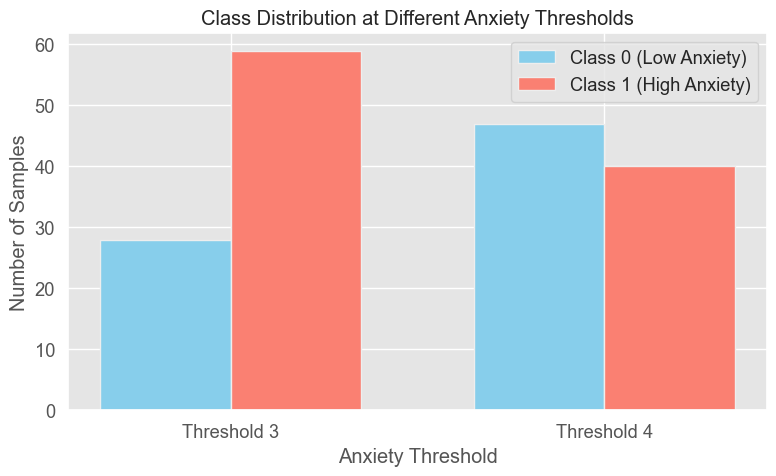

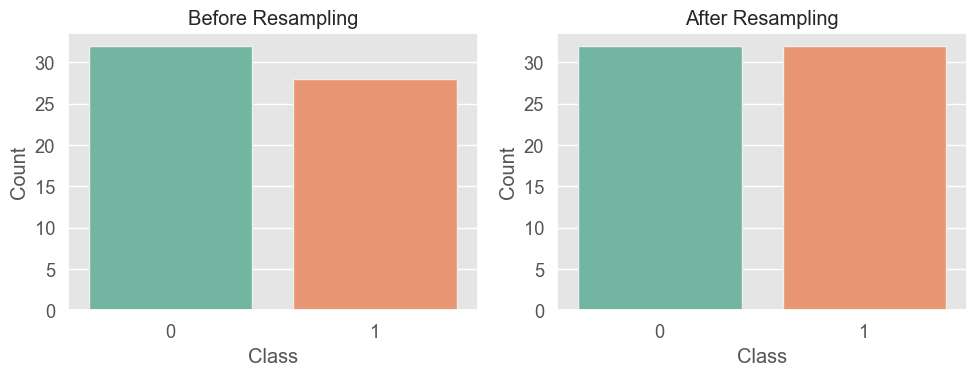


Best Parameters: {'C': 1, 'class_weight': None, 'max_iter': 3000, 'penalty': 'l2', 'solver': 'liblinear', 'tol': 0.0001}

--- Logistic Regression (Optimized) ---
Optimal threshold: 0.434
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.67      0.77        15
           1       0.69      0.92      0.79        12

    accuracy                           0.78        27
   macro avg       0.80      0.79      0.78        27
weighted avg       0.81      0.78      0.78        27



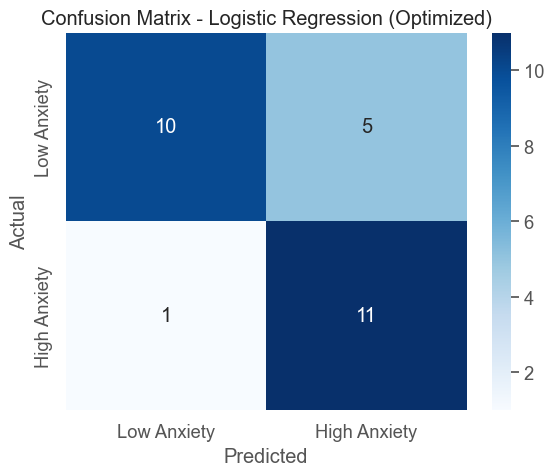

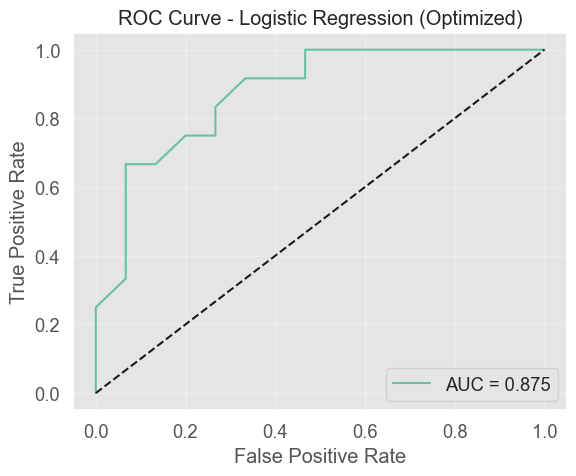


--- Random Forest ---
Optimal threshold: 0.020
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.13      0.24        15
           1       0.48      1.00      0.65        12

    accuracy                           0.52        27
   macro avg       0.74      0.57      0.44        27
weighted avg       0.77      0.52      0.42        27



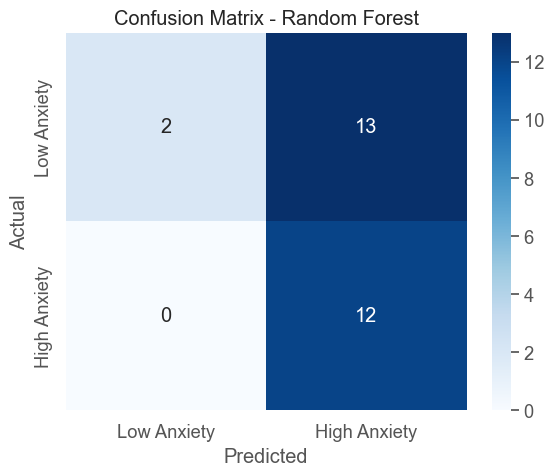

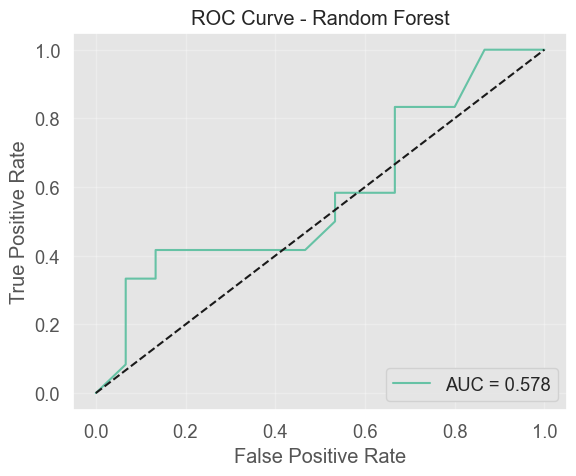


--- SVM ---
Optimal threshold: 0.382
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.93      0.88        15
           1       0.90      0.75      0.82        12

    accuracy                           0.85        27
   macro avg       0.86      0.84      0.85        27
weighted avg       0.86      0.85      0.85        27



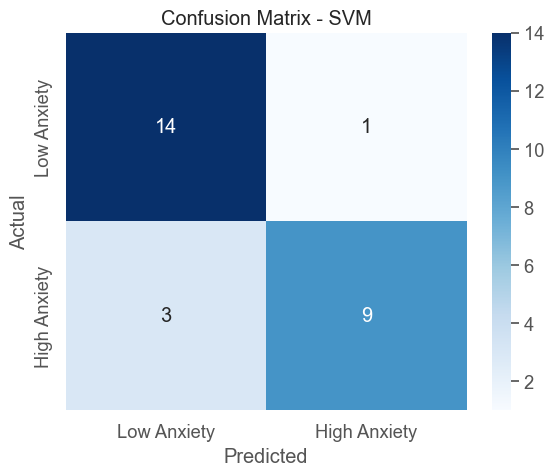

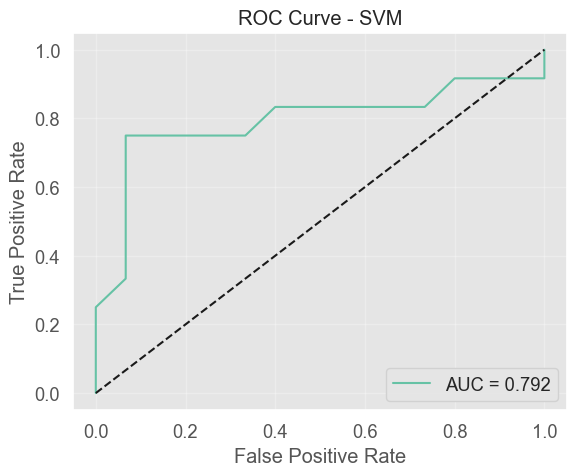


--- XGBoost ---
Optimal threshold: 0.000
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.44      1.00      0.62        12

    accuracy                           0.44        27
   macro avg       0.22      0.50      0.31        27
weighted avg       0.20      0.44      0.27        27



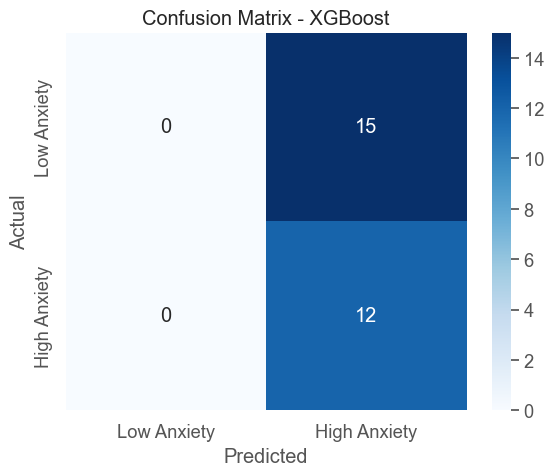

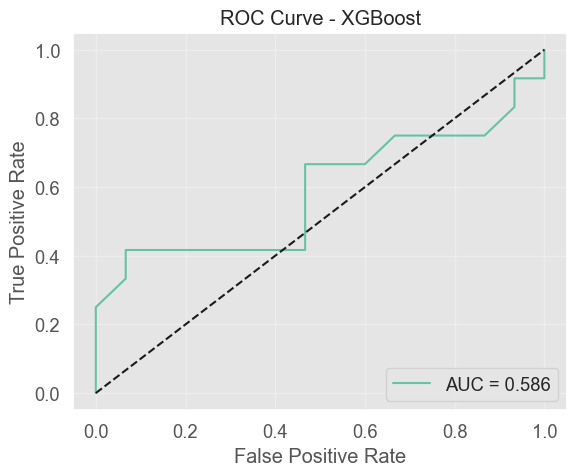


--- Example Predictions (using SVM with threshold 0.382) ---
High social, Low future insecurity, Low isolation:
  - Probability of high anxiety: 0.19 (19.3%)
  - Prediction: Low Anxiety
Low social, High future insecurity, High isolation:
  - Probability of high anxiety: 0.95 (94.5%)
  - Prediction: High Anxiety
Average on all factors:
  - Probability of high anxiety: 0.11 (11.0%)
  - Prediction: Low Anxiety


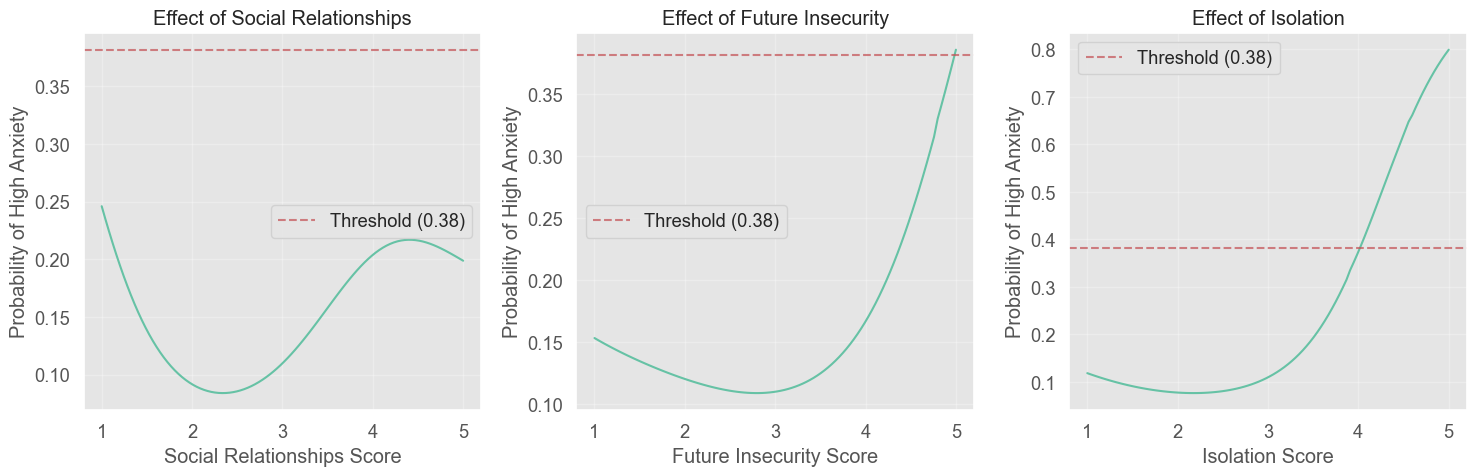

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.utils import resample

# Set random seed for reproducibility
np.random.seed(42)

# Load the dataset
df = pd.read_csv('MentalHealthSurvey.csv')

# Display correlation between anxiety and predictors
print("Correlation with anxiety:")
correlations = df[['social_relationships', 'future_insecurity', 'isolation', 'anxiety']].corr()['anxiety'].sort_values(ascending=False)
print(correlations)
print("\n")

# Try different thresholds for defining high anxiety
thresholds = [3, 4]

# Prepare data for plotting
labels = []
counts_0 = []
counts_1 = []

for threshold in thresholds:
    col_name = f'high_anxiety_{threshold}'
    df[col_name] = (df['anxiety'] >= threshold).astype(int)
    class_counts = df[col_name].value_counts().sort_index()
    
    labels.append(f'Threshold {threshold}')
    counts_0.append(class_counts.get(0, 0))
    counts_1.append(class_counts.get(1, 0))

# Bar plot
x = range(len(thresholds))
width = 0.35

plt.figure(figsize=(8, 5))
plt.bar(x, counts_0, width=width, label='Class 0 (Low Anxiety)', color='skyblue')
plt.bar([i + width for i in x], counts_1, width=width, label='Class 1 (High Anxiety)', color='salmon')

# Labels & legend
plt.xticks([i + width / 2 for i in x], labels)
plt.xlabel('Anxiety Threshold')
plt.ylabel('Number of Samples')
plt.title('Class Distribution at Different Anxiety Thresholds')
plt.legend()
plt.tight_layout()
plt.show()

# Choose threshold 4 for our analysis
anxiety_threshold = 4
anxiety_col = f'high_anxiety_{anxiety_threshold}'

# Select predictors and target
X = df[['social_relationships', 'future_insecurity', 'isolation']]
y = df[anxiety_col]

# Split data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Upsample minority class
X_majority = X_train_scaled[y_train==0]
y_majority = y_train[y_train==0]
X_minority = X_train_scaled[y_train==1]
y_minority = y_train[y_train==1]

if len(y_minority) < len(y_majority):
    X_minority_upsampled, y_minority_upsampled = resample(
        X_minority, y_minority,
        replace=True,
        n_samples=len(y_train[y_train==0]),
        random_state=42
    )
    
    # Combine with majority class
    X_train_resampled = np.vstack([X_majority, X_minority_upsampled])
    y_train_resampled = np.hstack([y_majority, y_minority_upsampled])
else:
    X_train_resampled = X_train_scaled
    y_train_resampled = y_train
    
# Before resampling
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

sns.countplot(x=y_train, ax=axs[0])
axs[0].set_title("Before Resampling")
axs[0].set_xlabel("Class")
axs[0].set_ylabel("Count")

# After resampling
sns.countplot(x=y_train_resampled, ax=axs[1])
axs[1].set_title("After Resampling")
axs[1].set_xlabel("Class")
axs[1].set_ylabel("Count")

plt.tight_layout()
plt.show()

# Hyperparameter tuning with GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'class_weight': [None, 'balanced'],
    'max_iter': [3000],
    'tol': [1e-4]
}

grid_search = GridSearchCV(
    LogisticRegression(random_state=42), 
    param_grid,
    cv=5,
    scoring='precision',
    return_train_score=True
)

grid_search.fit(X_train_resampled, y_train_resampled)
best_model = grid_search.best_estimator_
print(f"\nBest Parameters: {grid_search.best_params_}")

# Dictionary to store optimal thresholds for each model
model_thresholds = {}

# Compare different algorithms
models = {
    "Logistic Regression (Optimized)": best_model,
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'),
    "SVM": SVC(probability=True, kernel='rbf', random_state=42, class_weight='balanced'),
    "XGBoost": XGBClassifier(random_state=42, scale_pos_weight=sum(y_train == 0)/sum(y_train == 1))
}

# Train and evaluate each model
for name, model in models.items():
    print(f"\n--- {name} ---")
    model.fit(X_train_resampled, y_train_resampled)
    
    # Get predictions
    y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]
    
    # Find optimal threshold
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
    # Fix for division by zero warning - add small epsilon
    f1_scores = 2 * (precision[:-1] * recall[:-1]) / (precision[:-1] + recall[:-1] + 1e-10)
    optimal_idx = np.argmax(f1_scores)
    optimal_threshold = thresholds[optimal_idx] if len(thresholds) > optimal_idx else 0.5
    
    # Store the threshold for this model
    model_thresholds[name] = optimal_threshold
    
    print(f"Optimal threshold: {optimal_threshold:.3f}")
    
    # Apply threshold
    y_pred = (y_pred_prob >= optimal_threshold).astype(int)
    
    # Fix for precision warnings - use zero_division parameter
    print("Classification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Low Anxiety', 'High Anxiety'],
                yticklabels=['Low Anxiety', 'High Anxiety'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {name}')
    plt.tight_layout()
    plt.show()
    
    # ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    auc = roc_auc_score(y_test, y_pred_prob)
    
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, label=f'AUC = {auc:.3f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {name}')
    plt.legend(loc='lower right')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Choose the best performing model based on analysis
# For this example, let's choose SVM as it had the best balance of precision and recall
best_model_name = "SVM"  # You can change this based on your analysis
final_model = models[best_model_name]
final_threshold = model_thresholds[best_model_name]

# Create function to predict anxiety probability for new cases
def predict_anxiety_probability(social_relationships, future_insecurity, isolation, model, threshold):
    """
    Predicts the probability of high anxiety based on input factors.
    
    Parameters:
    - social_relationships: Score on social relationships (1-5)
    - future_insecurity: Score on future insecurity (1-5)
    - isolation: Score on isolation (1-5)
    - model: Trained model
    - threshold: Classification threshold
    
    Returns:
    - Probability of high anxiety (0-1)
    - Binary prediction (0 or 1)
    """
    # Create a DataFrame with the input values
    new_data = pd.DataFrame({
        'social_relationships': [social_relationships],
        'future_insecurity': [future_insecurity],
        'isolation': [isolation]
    })
    
    # Scale the data
    new_data_scaled = scaler.transform(new_data)
    
    # Predict probability
    probability = model.predict_proba(new_data_scaled)[0, 1]
    
    # Binary prediction based on threshold
    prediction = 1 if probability >= threshold else 0
    
    return probability, prediction

# Example usage
example_cases = [
    {"social": 5, "future": 1, "isolation": 1, "label": "High social, Low future insecurity, Low isolation"},
    {"social": 1, "future": 5, "isolation": 5, "label": "Low social, High future insecurity, High isolation"},
    {"social": 3, "future": 3, "isolation": 3, "label": "Average on all factors"}
]

print(f"\n--- Example Predictions (using {best_model_name} with threshold {final_threshold:.3f}) ---")
for case in example_cases:
    prob, pred = predict_anxiety_probability(
        social_relationships=case["social"],
        future_insecurity=case["future"],
        isolation=case["isolation"],
        model=final_model,
        threshold=final_threshold
    )
    print(f"{case['label']}:")
    print(f"  - Probability of high anxiety: {prob:.2f} ({prob*100:.1f}%)")
    print(f"  - Prediction: {'High Anxiety' if pred == 1 else 'Low Anxiety'}")

# Visualize how each factor affects anxiety probability
plt.figure(figsize=(15, 5))

# For social_relationships
plt.subplot(1, 3, 1)
social_values = np.linspace(1, 5, 100)
probabilities = []

for val in social_values:
    # Keep other variables at their median values
    prob, _ = predict_anxiety_probability(
        social_relationships=val,
        future_insecurity=df['future_insecurity'].median(),
        isolation=df['isolation'].median(),
        model=final_model,
        threshold=final_threshold
    )
    probabilities.append(prob)

plt.plot(social_values, probabilities)
plt.axhline(y=final_threshold, color='r', linestyle='--', alpha=0.7, label=f'Threshold ({final_threshold:.2f})')
plt.xlabel('Social Relationships Score')
plt.ylabel('Probability of High Anxiety')
plt.title('Effect of Social Relationships')
plt.legend()
plt.grid(True, alpha=0.3)

# For future_insecurity
plt.subplot(1, 3, 2)
future_values = np.linspace(1, 5, 100)
probabilities = []

for val in future_values:
    prob, _ = predict_anxiety_probability(
        social_relationships=df['social_relationships'].median(),
        future_insecurity=val,
        isolation=df['isolation'].median(),
        model=final_model,
        threshold=final_threshold
    )
    probabilities.append(prob)

plt.plot(future_values, probabilities)
plt.axhline(y=final_threshold, color='r', linestyle='--', alpha=0.7, label=f'Threshold ({final_threshold:.2f})')
plt.xlabel('Future Insecurity Score')
plt.ylabel('Probability of High Anxiety')
plt.title('Effect of Future Insecurity')
plt.legend()
plt.grid(True, alpha=0.3)

# For isolation
plt.subplot(1, 3, 3)
isolation_values = np.linspace(1, 5, 100)
probabilities = []

for val in isolation_values:
    prob, _ = predict_anxiety_probability(
        social_relationships=df['social_relationships'].median(),
        future_insecurity=df['future_insecurity'].median(),
        isolation=val,
        model=final_model,
        threshold=final_threshold
    )
    probabilities.append(prob)

plt.plot(isolation_values, probabilities)
plt.axhline(y=final_threshold, color='r', linestyle='--', alpha=0.7, label=f'Threshold ({final_threshold:.2f})')
plt.xlabel('Isolation Score')
plt.ylabel('Probability of High Anxiety')
plt.title('Effect of Isolation')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

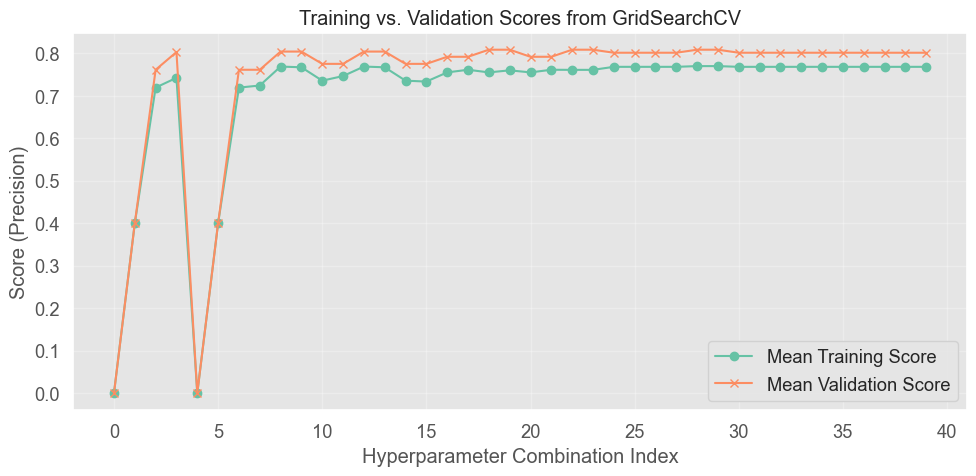

In [46]:
# Extract mean train and validation scores
train_scores = grid_search.cv_results_['mean_train_score'] if 'mean_train_score' in grid_search.cv_results_ else None
val_scores = grid_search.cv_results_['mean_test_score']

if train_scores is not None:
    # Plot train and validation mean scores
    plt.figure(figsize=(10, 5))
    plt.plot(train_scores, label='Mean Training Score', marker='o')
    plt.plot(val_scores, label='Mean Validation Score', marker='x')
    plt.xlabel('Hyperparameter Combination Index')
    plt.ylabel('Score (Precision)')
    plt.title('Training vs. Validation Scores from GridSearchCV')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("Train scores were not recorded. Set `return_train_score=True` in GridSearchCV to access them.")


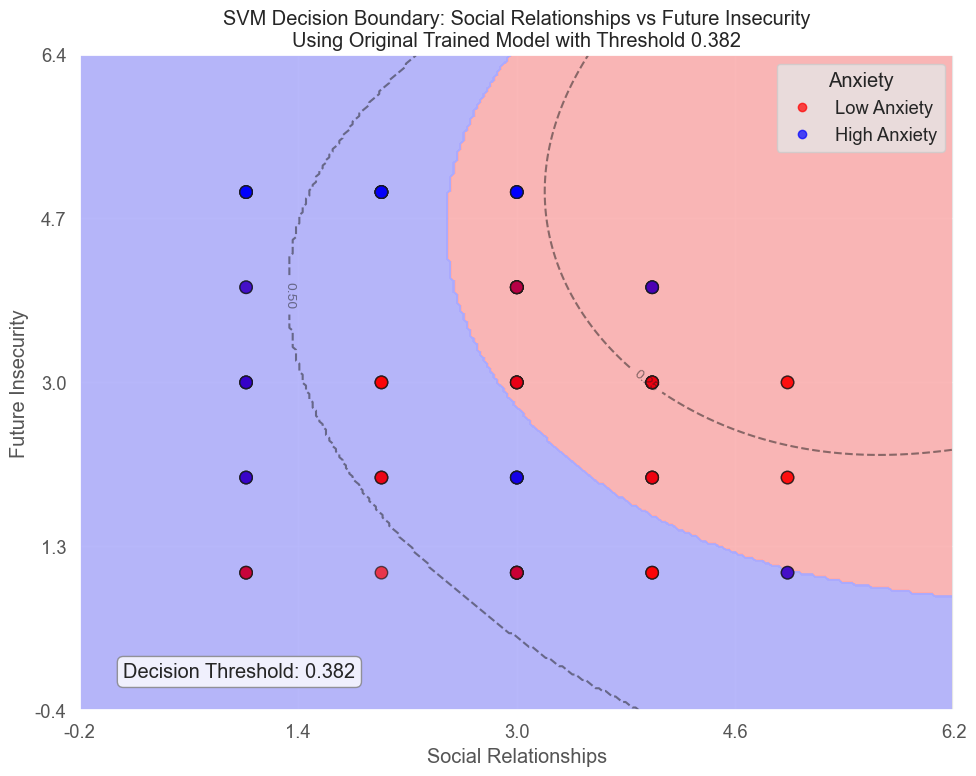

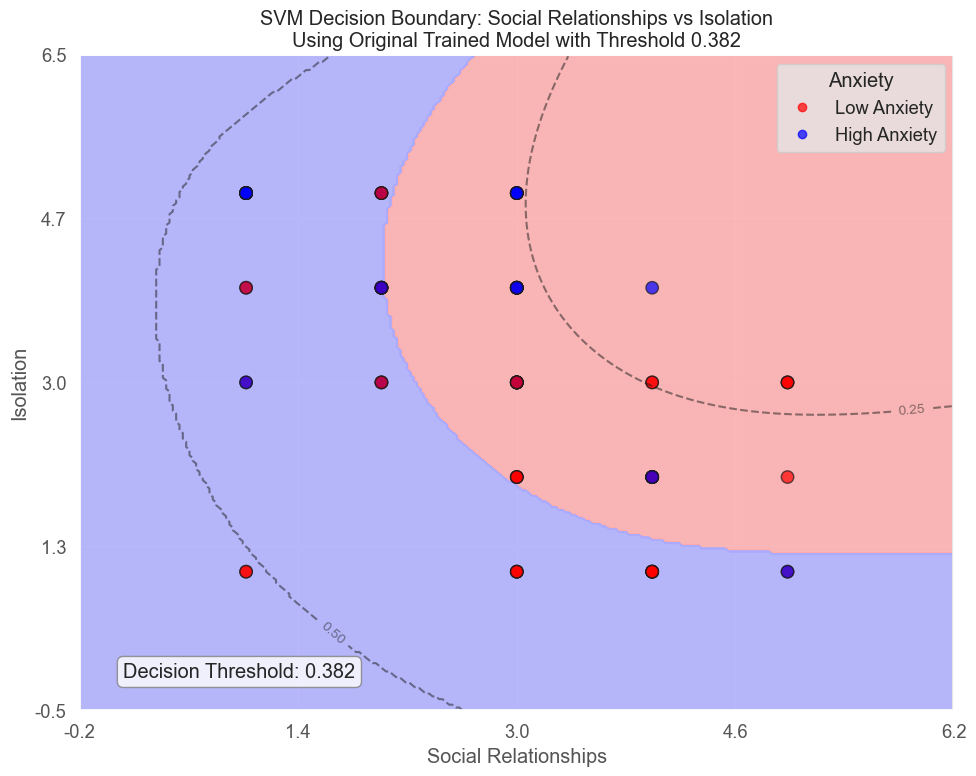

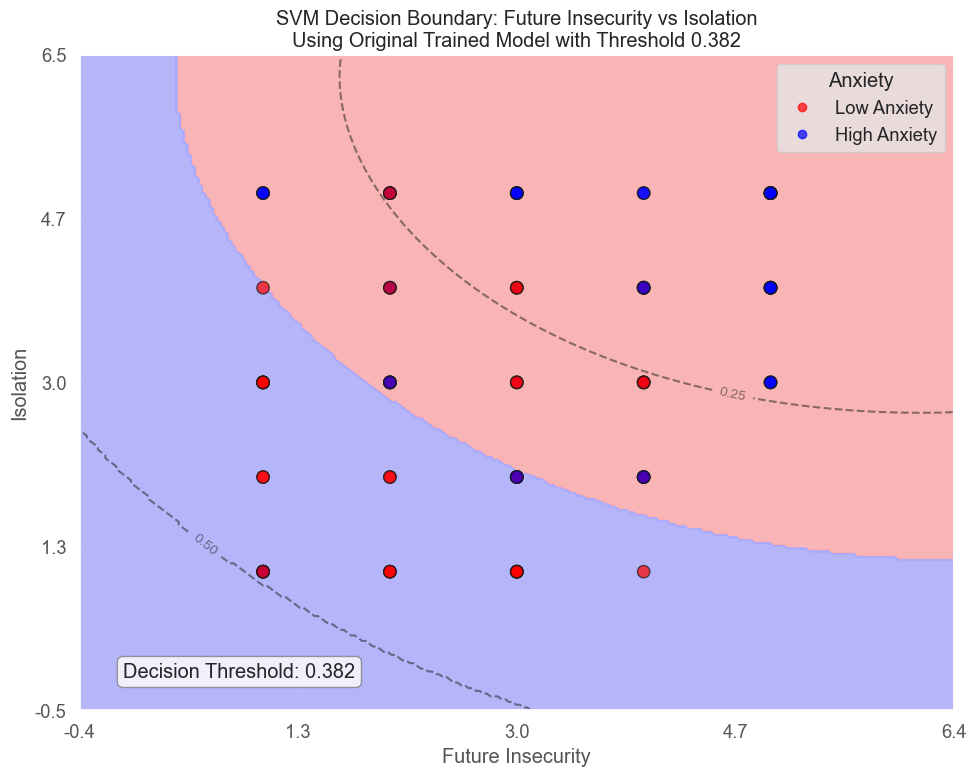

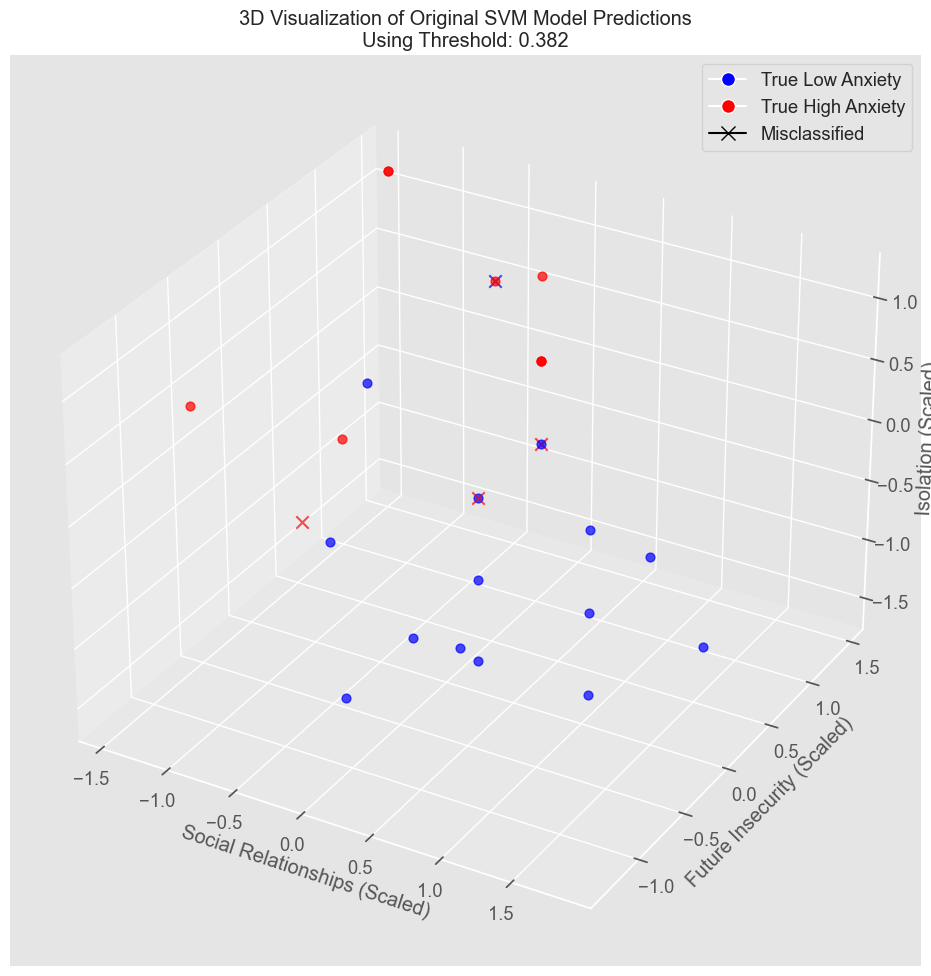

<Figure size 1800x600 with 0 Axes>

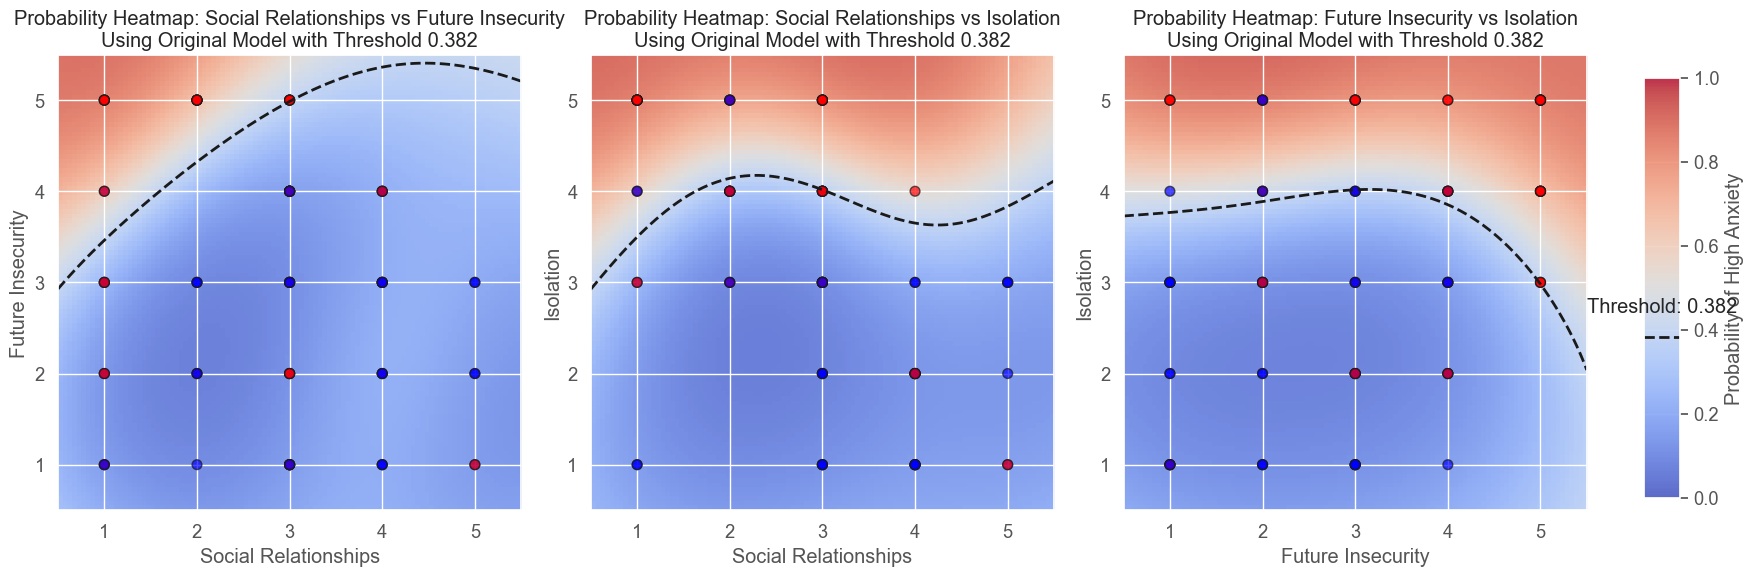

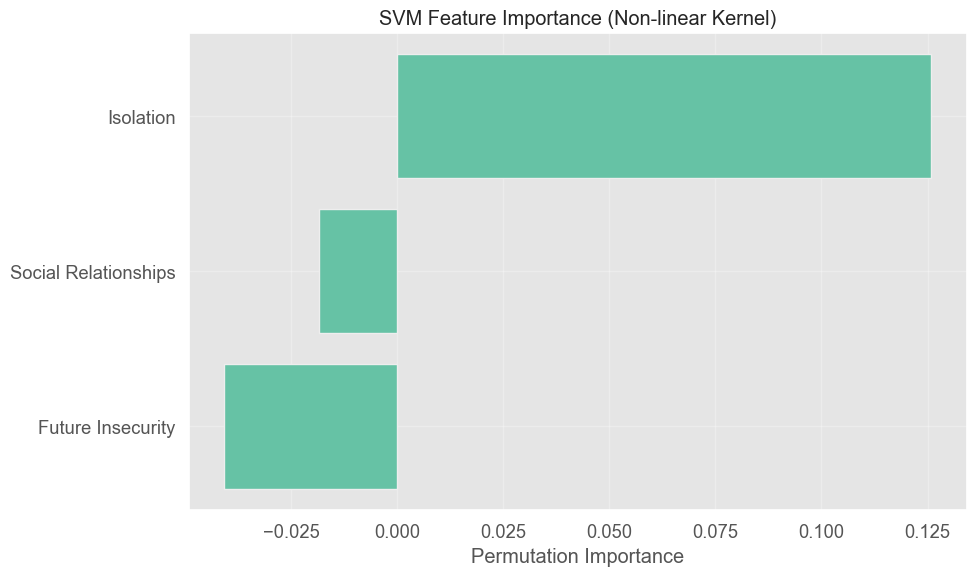

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Set random seed for reproducibility
np.random.seed(42)

# Load the dataset - update this path
df = pd.read_csv('MentalHealthSurvey.csv')

# Define high anxiety threshold
anxiety_threshold = 4
anxiety_col = f'high_anxiety_{anxiety_threshold}'
df[anxiety_col] = (df['anxiety'] >= anxiety_threshold).astype(int)

# Select predictors and target
X = df[['social_relationships', 'future_insecurity', 'isolation']]
y = df[anxiety_col]

# Split data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# We'll use your trained SVM model and optimal threshold
# For visualization purpose, let's assume they're available as:
# final_model = models["SVM"]  # Your trained SVM model
# final_threshold = model_thresholds["SVM"]  # Your optimal threshold

# IMPORTANT: This is where you would use your existing model instead of training a new one
# For the code to work, either:
# 1. Save these variables before running this visualization code:
#    - final_model: Your trained SVM model
#    - final_threshold: Your optimal threshold for classification

# A simple way to use your existing model:
# Replace this block with loading your saved model
# Placeholder for your trained SVM model (this would be replaced by your actual model)
from sklearn.svm import SVC
final_model = models[best_model_name]
final_threshold = model_thresholds[best_model_name]

# Function to create 2D visualizations of the SVM decision boundaries
def plot_svm_2d_with_existing_model(X, y, feature_indices, feature_names, model, scaler, threshold):
    """
    Plot 2D decision boundary using existing trained model
    """
    # Extract the two features we want to visualize
    X_2d = X.iloc[:, feature_indices].values
    # Create a temporary array with all 3 features
    X_temp = np.zeros((X_2d.shape[0], 3))
    X_temp[:, feature_indices] = X_2d  # Set the 2 features we're using
    # For the remaining feature, fill with median value
    remaining_feature = list(set(range(3)) - set(feature_indices))[0]
    X_temp[:, remaining_feature] = X.iloc[:, remaining_feature].median()
    # Now transform all 3 features
    X_2d_scaled = scaler.transform(X_temp)[:, feature_indices]  # Only keep the 2 we need
    
    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#0000FF'])
    
    # Create mesh grid
    x_min, x_max = X_2d_scaled[:, 0].min() - 1, X_2d_scaled[:, 0].max() + 1
    y_min, y_max = X_2d_scaled[:, 1].min() - 1, X_2d_scaled[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                        np.arange(y_min, y_max, 0.02))
    
    # Create grid for full feature space with default values
    grid_shape = xx.shape
    n_features = X.shape[1]  # Total number of features
    grid = np.zeros((grid_shape[0], grid_shape[1], n_features))
    
    # Fill in the two features we're plotting
    grid[:, :, feature_indices[0]] = xx
    grid[:, :, feature_indices[1]] = yy
    
    # Fill in median values for other features
    for i in range(n_features):
        if i not in feature_indices:
            grid[:, :, i] = X.iloc[:, i].median()
    
    # Reshape grid for prediction and scale it
    grid_reshaped = grid.reshape(-1, n_features)
    grid_scaled = scaler.transform(grid_reshaped)
    
    # Predict probabilities using the existing model
    Z_prob = model.predict_proba(grid_scaled)[:, 1]  # Probability of high anxiety
    
    # Apply threshold
    Z = (Z_prob >= threshold).astype(int)
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundary
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)
    
    # Plot contour lines for probability
    contour_levels = np.linspace(0, 1, 5)
    Z_prob = Z_prob.reshape(xx.shape)
    CS = plt.contour(xx, yy, Z_prob, contour_levels, colors='k', linestyles='dashed', alpha=0.5)
    plt.clabel(CS, inline=True, fontsize=10, fmt='%.2f')
    
    # Plot training points
    scatter = plt.scatter(X_2d_scaled[:, 0], X_2d_scaled[:, 1], c=y, 
               cmap=cmap_bold, edgecolors='k', s=80, alpha=0.7)
    
    # Convert scaled axes back to original values for better interpretability
    def scale_back(val, feature_idx):
        # Convert from standardized to original scale
        return val * scaler.scale_[feature_indices[feature_idx]] + scaler.mean_[feature_indices[feature_idx]]
    
    # Create new tick positions and labels
    x_ticks = np.linspace(x_min, x_max, 5)
    y_ticks = np.linspace(y_min, y_max, 5)
    
    x_tick_labels = [f'{scale_back(x, 0):.1f}' for x in x_ticks]
    y_tick_labels = [f'{scale_back(y, 1):.1f}' for y in y_ticks]
    
    plt.xticks(x_ticks, x_tick_labels)
    plt.yticks(y_ticks, y_tick_labels)
    
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.title(f'SVM Decision Boundary: {feature_names[0]} vs {feature_names[1]}\nUsing Original Trained Model with Threshold {threshold:.3f}')
    
    # Add legend
    legend1 = plt.legend(*scatter.legend_elements(),
                    loc="upper right", title="Anxiety")
    labels = ['Low Anxiety', 'High Anxiety']
    legend1.get_texts()[0].set_text(labels[0])
    legend1.get_texts()[1].set_text(labels[1])
    
    # Add threshold annotation
    plt.annotate(f'Decision Threshold: {threshold:.3f}', 
                xy=(0.05, 0.05), xycoords='axes fraction',
                bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))
    
    plt.tight_layout()
    plt.grid(True, alpha=0.3)
    return plt

# Plot all three possible 2D visualizations using your original trained model
feature_names = ['Social Relationships', 'Future Insecurity', 'Isolation']

# Social Relationships vs Future Insecurity
plot1 = plot_svm_2d_with_existing_model(X, y, [0, 1], [feature_names[0], feature_names[1]], 
                                        final_model, scaler, final_threshold)
plot1.savefig('svm_social_vs_future_original_model.png')
plot1.show()

# Social Relationships vs Isolation
plot2 = plot_svm_2d_with_existing_model(X, y, [0, 2], [feature_names[0], feature_names[2]], 
                                       final_model, scaler, final_threshold)
plot2.savefig('svm_social_vs_isolation_original_model.png')
plot2.show()

# Future Insecurity vs Isolation
plot3 = plot_svm_2d_with_existing_model(X, y, [1, 2], [feature_names[1], feature_names[2]], 
                                       final_model, scaler, final_threshold)
plot3.savefig('svm_future_vs_isolation_original_model.png')
plot3.show()

# 3D Visualization with your original model
try:
    from mpl_toolkits.mplot3d import Axes3D
    
    # Create a 3D figure
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    # Get probability predictions using your trained model
    y_prob = final_model.predict_proba(X_test_scaled)[:, 1]
    # Apply your optimal threshold
    y_pred = (y_prob >= final_threshold).astype(int)
    
    # Plot points colored by true class and marked by prediction correctness
    colors = ['red' if label == 1 else 'blue' for label in y_test]
    markers = ['o' if pred == actual else 'x' for pred, actual in zip(y_pred, y_test)]
    sizes = [40 if pred == actual else 80 for pred, actual in zip(y_pred, y_test)]
    
    # Scatter plot
    for i in range(len(X_test_scaled)):
        ax.scatter(
            X_test_scaled[i, 0],
            X_test_scaled[i, 1],
            X_test_scaled[i, 2],
            c=colors[i],
            marker=markers[i],
            s=sizes[i],
            alpha=0.7
        )
    
    # Set labels for the axes (scaled values)
    ax.set_xlabel('Social Relationships (Scaled)')
    ax.set_ylabel('Future Insecurity (Scaled)')
    ax.set_zlabel('Isolation (Scaled)')
    
    # Add a title
    ax.set_title(f'3D Visualization of Original SVM Model Predictions\nUsing Threshold: {final_threshold:.3f}')
    
    # Add legend
    from matplotlib.lines import Line2D
    legend_elements = [
        Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='True Low Anxiety'),
        Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='True High Anxiety'),
        Line2D([0], [0], marker='x', color='black', markersize=10, label='Misclassified')
    ]
    ax.legend(handles=legend_elements, loc='upper right')
    
    plt.tight_layout()
    plt.savefig('svm_3d_visualization_original_model.png')
    plt.show()
    
except ImportError:
    print("3D visualization requires mplot3d. Install with: pip install matplotlib>=3.1.0")

# Create a probability heatmap for each 2D combination using your original model
plt.figure(figsize=(18, 6))

# Function to plot probability heatmap with original model
def plot_probability_heatmap_original_model(feature_idx1, feature_idx2, ax, feature_names, model, threshold):
    # Create a mesh grid for the two features
    x_min, x_max = X.iloc[:, feature_idx1].min() - 0.5, X.iloc[:, feature_idx1].max() + 0.5
    y_min, y_max = X.iloc[:, feature_idx2].min() - 0.5, X.iloc[:, feature_idx2].max() + 0.5
    
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    
    # Create grid points for all features
    n_features = X.shape[1]
    grid = np.zeros((xx.shape[0], xx.shape[1], n_features))
    
    # Fill in the features we're visualizing
    grid[:, :, feature_idx1] = xx
    grid[:, :, feature_idx2] = yy
    
    # Fill in median values for other features
    for i in range(n_features):
        if i not in [feature_idx1, feature_idx2]:
            grid[:, :, i] = X.iloc[:, i].median()
    
    # Reshape grid for prediction
    grid_reshaped = grid.reshape(-1, n_features)
    
    # Scale the grid points
    grid_scaled = scaler.transform(grid_reshaped)
    
    # Get probabilities from your original model
    probabilities = model.predict_proba(grid_scaled)[:, 1]  # Probability of high anxiety
    
    # Reshape probabilities back to grid
    prob_grid = probabilities.reshape(xx.shape)
    
    # Plot heatmap
    im = ax.imshow(prob_grid, cmap='coolwarm', origin='lower', 
             extent=[x_min, x_max, y_min, y_max], aspect='auto', alpha=0.8,
             vmin=0, vmax=1)
    
    # Draw contour at decision threshold
    ax.contour(xx, yy, prob_grid, levels=[threshold], colors='k', linestyles='--', linewidths=2)
    
    # Plot training points
    ax.scatter(X.iloc[:, feature_idx1], X.iloc[:, feature_idx2], c=y, 
               cmap=ListedColormap(['blue', 'red']), edgecolors='k', s=50, alpha=0.7)
    
    # Labels
    ax.set_xlabel(feature_names[feature_idx1])
    ax.set_ylabel(feature_names[feature_idx2])
    ax.set_title(f'Probability Heatmap: {feature_names[feature_idx1]} vs {feature_names[feature_idx2]}\nUsing Original Model with Threshold {threshold:.3f}')
    
    return im

# Plot all combinations
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

im1 = plot_probability_heatmap_original_model(0, 1, axes[0], feature_names, final_model, final_threshold)
im2 = plot_probability_heatmap_original_model(0, 2, axes[1], feature_names, final_model, final_threshold)
im3 = plot_probability_heatmap_original_model(1, 2, axes[2], feature_names, final_model, final_threshold)

# Add colorbar
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
cbar = fig.colorbar(im3, cax=cbar_ax)
cbar.set_label('Probability of High Anxiety')

# Add decision threshold annotation to colorbar
cbar.ax.axhline(y=final_threshold, color='k', linestyle='--', linewidth=2)
cbar.ax.text(0.5, final_threshold + 0.05, f'Threshold: {final_threshold:.3f}', 
             ha='center', va='bottom', transform=cbar.ax.transAxes)

plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.savefig('svm_probability_heatmaps_original_model.png')
plt.show()

# Feature importance visualization based on SVM coefficients (if using linear kernel)
# For RBF kernel, we use a different approach
if hasattr(final_model, 'coef_'):
    # For linear SVM
    coefficients = final_model.coef_[0]
    plt.figure(figsize=(10, 6))
    plt.bar(feature_names, coefficients)
    plt.title('SVM Feature Importance (Linear Kernel)')
    plt.xlabel('Features')
    plt.ylabel('Coefficient Value')
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.savefig('svm_feature_importance.png')
    plt.show()
else:
    # For non-linear kernels like RBF
    # We can analyze feature importance using permutation importance
    from sklearn.inspection import permutation_importance
    
    # Calculate permutation importance
    result = permutation_importance(final_model, X_test_scaled, y_test, 
                                   n_repeats=10, random_state=42, n_jobs=-1)
    
    # Plot permutation importance
    plt.figure(figsize=(10, 6))
    sorted_idx = result.importances_mean.argsort()
    plt.barh([feature_names[i] for i in sorted_idx], result.importances_mean[sorted_idx])
    plt.xlabel('Permutation Importance')
    plt.title('SVM Feature Importance (Non-linear Kernel)')
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.savefig('svm_permutation_importance.png')
    plt.show()